

</br>
<font size="12">Estimating admixture proportions using Genotype</font>


For this exercise we will again use data from the Blue Wildebeest. To simplify the analyses we have included only one of the Brindled wildebeest populations (B-Etosha). We have included one population from each of the five blue wildebeest subspecies,except for the eastern white-bearded wildebeest for which we included three populations.  

<img src="https://raw.githubusercontent.com/popgenDK/popgenDK.github.io/gh-pages/images/slider/wildeBeastMap.png" alt="image info" />


# Software and data



### Software
We will be using plink, PCAone and ADMIXTURE for this exercise. First let's see if the software is installed.

In [26]:
# shared tools and data folder
source /home/student/USER/miniconda.sh
conda activate anders
TOOL_PATH=/home/student/opt/anders # for standalone tool script including java package
SHARED_PATH=/home/tch_wyd/myname/shared # For reference database
INPUT_PATH=/home/tch_wyd/myname/inputs/pca  # for input data


(anders) (base) (anders) (anders) (anders) (anders) 


In [27]:
ADMIXTURE=/home/tch_myname/admixture_data/admixture

echo --programs that are installed:--
ls ${ADMIXTURE}
which plink
which PCAone
which evalAdmix


(anders) (anders) --programs that are installed:--
(anders) /home/tch_myname/admixture_data/admixture
(anders) /home/student/miniconda3/envs/anders/bin/plink
(anders) /home/student/miniconda3/envs/anders/bin/PCAone
(anders) /home/student/miniconda3/envs/anders/bin/evalAdmix
(anders) 


### Data sets

First let's make a folder in your home directory, then then we will copy the data into your folder.

In [28]:

#make folder 
mkdir -p ~/sysu_day4_admixture

# enter folder
cd ~/sysu_day4_admixture

cp -sf ${SHARED_PATH}/visFuns.R .
cp -sf ${SHARED_PATH}/newPlotPlink.R .
cp -sf /home/tch_myname/admixture_data/admixFun.R .

##make links to files and add them to the folder
cp -sf ${INPUT_PATH}/blue_wildebeest_thin* .
cp -r -sf ${INPUT_PATH}/multiRunK7 .
cp -r -sf /home/tch_myname/admixture_data/allK .
cp -sf /home/tch_myname/admixture_data/admixture_quiz1.json .

echo --- files in folder ---
ls 

(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) --- files in folder ---
(anders) admix_bonus_quiz1.json         blue_wildebeest_thin.bed
admix_bonus_quiz2.json         blue_wildebeest_thin.bim
admixFun.R                     blue_wildebeest_thin.fam
admixture_quiz1.json           blue_wildebeest_thin.log
all.arg                        blue_wildebeest_thin.nosex
all.beagle.gz                  multiRunK7
all.files                      newPlotPlink.R
all.fopt.gz                    pcaone.eigvals
allK                           pcaone.eigvecs
allK3.likes                    pcaone.eigvecs2
allK4.likes                    pcaone.ld.prune.in
all.log                        pcaone.ld.prune.out
all.mafs.gz                    pcaone.log
all.qopt                       pcaone.residuals
blue_wildebeest_noLD.2.eval_1  resource
blue_wildebeest_noLD.3.eval_1  sample1.log
blue_wildebeest_noLD.4.eval_1  sample1.q

In [29]:
# set up R working space
work_d <- path.expand("~/sysu_day4_admixture")
setwd(work_d)

In [30]:
# set up python working space
import os
work_d = os.path.expanduser("~/sysu_day4_admixture")
os.chdir(work_d)

### The fam file
The genotype data is stored in binary plink files (*.bed,*.fam,*.bim). Lets first look into the fam file which described the individuals in the data

In [31]:
echo -- number of lines in fam file --
wc -l blue_wildebeest_thin.fam

echo -- first 10 lines fam file --
head blue_wildebeest_thin.fam

echo -- counts of populations/subspecies from first column of fam file --
cut -f1 -d" " blue_wildebeest_thin.fam | sort | uniq -c

-- number of lines in fam file --
(anders) 73 blue_wildebeest_thin.fam
(anders) (anders) -- first 10 lines fam file --
(anders) E-Amboseli CTauKeS__698 0 0 0 -9
E-Amboseli CTauKeS__699 0 0 0 -9
E-Amboseli CTauKeS__700 0 0 0 -9
E-Amboseli CTauKeS__701 0 0 0 -9
E-Amboseli CTauKeS__702 0 0 0 -9
E-Amboseli CTauKeS__704 0 0 0 -9
E-Amboseli CTauKeS__705 0 0 0 -9
E-Amboseli CTauKeS__706 0 0 0 -9
E-Amboseli CTauKeS__707 0 0 0 -9
E-Nairobi CTauKeS__709 0 0 0 -9
(anders) (anders) -- counts of populations/subspecies from first column of fam file --
(anders)       6 B-Ethosha
      3 C-Luangwa
      9 E-Amboseli
     11 E-Monduli
     10 E-Nairobi
      6 N-Selous
     28 W-Serengeti
(anders) 


# The bim file
Now let's look into the bim file. This is the file that describes the different genetic variants in the data set.

In [32]:
echo -- number of lines in bim file --
wc -l blue_wildebeest_thin.bim

echo -e "\n-- first 10 lines bim file --"
echo -e "CHR\tvariantID CM\tPosition \t allele_1\t allele_2"
head blue_wildebeest_thin.bim

echo -e "\n-- counts number of variants per chromosone from the first column of bim file --"
echo \#Var Chromosome_name
cat blue_wildebeest_thin.bim | cut -f1  | uniq -c


-- number of lines in bim file --
(anders) 990980 blue_wildebeest_thin.bim
(anders) (anders) 
-- first 10 lines bim file --
(anders) CHR	variantID CM	Position 	 allele_1	 allele_2
(anders) 1	1:24346	0	24346	C	A
1	1:27283	0	27283	A	C
1	1:29167	0	29167	A	G
1	1:34548	0	34548	A	G
1	1:35562	0	35562	A	T
1	1:35922	0	35922	T	C
1	1:37028	0	37028	C	T
1	1:39322	0	39322	G	A
1	1:52974	0	52974	G	A
1	1:56563	0	56563	A	T
(anders) (anders) 
-- counts number of variants per chromosone from the first column of bim file --
(anders) #Var Chromosome_name
(anders)   68999 1
  66358 2
  48520 4
  45498 5
  46745 6
  50149 7
  45339 8
  41591 9
  41285 10
  39690 11
  39076 12
  37933 13
  37387 14
  31725 15
  32895 16
  31831 17
  29372 18
  32197 19
  27537 20
  22190 21
  22329 22
  27006 23
  23486 24
  20876 25
  20764 26
  20423 27
  19165 28
  20614 29
(anders) 


Run the code below to start a quiz. 

In [33]:

from jupyterquiz import display_quiz
display_quiz('admixture_quiz1.json')


<IPython.core.display.Javascript object>

## LD pruning

It is recommended that LD pruning is performed prior to running ADMIXTURE. This is often done on the whole set of individuals using plink, while assmuming that there is no population structure. However, we actually expect there could be lots of population structure in our data, as individuals come from many different localities. Therefore, we will us a new method, PCAone, that corrects for population structure using PCA. To perform LD pruning we will choose the number of PCAs needed which in this case is **-k=6** since we expect there are 7 different populations (6 PCs allows for modelling 7 populations), because each PC can split data into to groups. We will use a LD threshold of **r2=0.1** which removes variants that are in LD with any other variant with a correlation coefficent above 0.1. Since we don't want to calculate LD between all pairs of variants in the whole genome, we will estimate LD in a sliding window of size **1000000=1Mb**. 

The command to do so can be seen below.



In [34]:

PCAone -b blue_wildebeest_thin -k 6 --ld-stats 0 --ld-r2 0.1 -n 2 --ld-bp 1000000


Machine name: x86_64
Node name: a6000-gpu1
Operating system release: 4.18.0-372.9.1.el8.x86_64
Operating system version: #1 SMP Tue May 10 14:48:47 UTC 2022
Operating system name: Linux
PCAone (v0.4.4)    https://github.com/Zilong-Li/PCAone
Options in effect:
/home/student/miniconda3/envs/anders/bin/PCAone.avx2 -b blue_wildebeest_thin -k 6 --ld-stats 0 --ld-r2 0.1 -n 2 --ld-bp 1000000 
[24/07/2025-10:11:30] program started
[24/07/2025-10:11:30] start parsing PLINK format
[24/07/2025-10:11:30] N samples is 73. M snps is 990980
[24/07/2025-10:11:30] begin to run PCAone RSVD with in-core mode
[24/07/2025-10:11:30] running in memory mode with PCAone (algorithm2).
[24/07/2025-10:11:33] running of epoch=1, diff=0.0365785
[24/07/2025-10:11:34] running of epoch=2, diff=0.000345445
[24/07/2025-10:11:36] running of epoch=3, diff=0.000289142
[24/07/2025-10:11:37] running of epoch=4, diff=7.48945e-05
PCAone converged but continues running to get S and V.
[24/07/2025-10:11:38] running of epoch=5, d

The software prints out a new list of variants that are now not in LD with eachother. We will extract those sites using plink, and create a new plink file named blue_wildebeest_noLD.

In [35]:
echo --number of variants to be keept --
wc -l pcaone.ld.prune.in
 
echo -e "\n --Extract variants using plink --"
 plink --bfile blue_wildebeest_thin --extract pcaone.ld.prune.in --make-bed --threads 2 --out blue_wildebeest_noLD  --chr-set 29

--number of variants to be keept --
(anders) 146632 pcaone.ld.prune.in
(anders) (anders) 
 --Extract variants using plink --
(anders) PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to blue_wildebeest_noLD.log.
Options in effect:
  --bfile blue_wildebeest_thin
  --chr-set 29
  --extract pcaone.ld.prune.in
  --make-bed
  --out blue_wildebeest_noLD
  --threads 2

515181 MB RAM detected; reserving 257590 MB for main workspace.
990980 variants loaded from .bim file.
73 samples (0 males, 0 females, 73 ambiguous) loaded from .fam.
Ambiguous sex IDs written to blue_wildebeest_noLD.nosex .
--extract: 146632 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 73 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.998757.
146632 variants and 73 samples pass filters and QC.
Note



## ADMIXTURE

We are now ready to run ADMIXTURE. First, let's look at the options of the program.

In [36]:
${ADMIXTURE} --help

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

                                                                              
  ADMIXTURE basic usage:  (see manual for complete reference)                 
    % admixture [options] inputFile K                                         
                                                                              
  where:                                                                      
    K is the number of populations; and                                       
    inputFile may be:                     

As can be seen in the code above, we need to input our plink file and we need to choose a number of ancestral populations to use. In our case, the most likely relevant number of assumed ancestral populations is 7 - one for each sampling locality. ADMIXTURE uses numeric optimisation based on a random starting guess of the parameters. Therefore, we will specify a seed for the random numbers, so that we can reproduce the results (else we will get a different result each time we run it). 

To make is run faster we will use 10 CPU threads. Run the following ( will take several minutes).


In [37]:
# 5min to run
# ${ADMIXTURE} --seed 0 -j10 blue_wildebeest_noLD.bed 7

##it takes too long, we just copy the results 
cp /home/tch_myname/sysu_day4_admixture/blue_wildebeest_noLD.7.Q  .


(anders) (anders) (anders) (anders) (anders) 


In [38]:
# let see which files it produces 
echo -- files sorted. last files are the most recent --
ls -r

(anders) -- files sorted. last files are the most recent --
(anders) visFuns.R                   blue_wildebeest_noLD.nosex
scripts                     blue_wildebeest_noLD.log
sample3.qopt                blue_wildebeest_noLD.fam
sample3.log                 blue_wildebeest_noLD.bim
sample3boot.qopt            blue_wildebeest_noLD.bed
sample3boot.log             blue_wildebeest_noLD.7.Q
sample2.qopt                blue_wildebeest_noLD.7.P
sample2.log                 blue_wildebeest_noLD.7.eval_4
sample2boot.qopt            blue_wildebeest_noLD.7.eval_1
sample2boot.log             blue_wildebeest_noLD.7.eval
sample1V2.qopt              blue_wildebeest_noLD.6.eval_1
sample1V2.log               blue_wildebeest_noLD.5.eval_1
sample1.qopt                blue_wildebeest_noLD.4.eval_1
sample1.log                 blue_wildebeest_noLD.3.eval_1
resource                    blue_wildebeest_noLD.2.eval_1
pcaone.residuals            all.qopt
pcaone.log                  all.mafs.gz
pcaone.ld.prune.out


You should find two files ending with * .7.Q and * .7.P respectively. These are the estimated ancestry proportions and allele frequencies in the 7 inferred populations. 

### Plotting admixture proportions
Let's plot the results. For this we will use R.



  B-Ethosha   C-Luangwa  E-Amboseli   E-Monduli   E-Nairobi    N-Selous 
          6           3           9          11          10           6 
W-Serengeti 
         28 

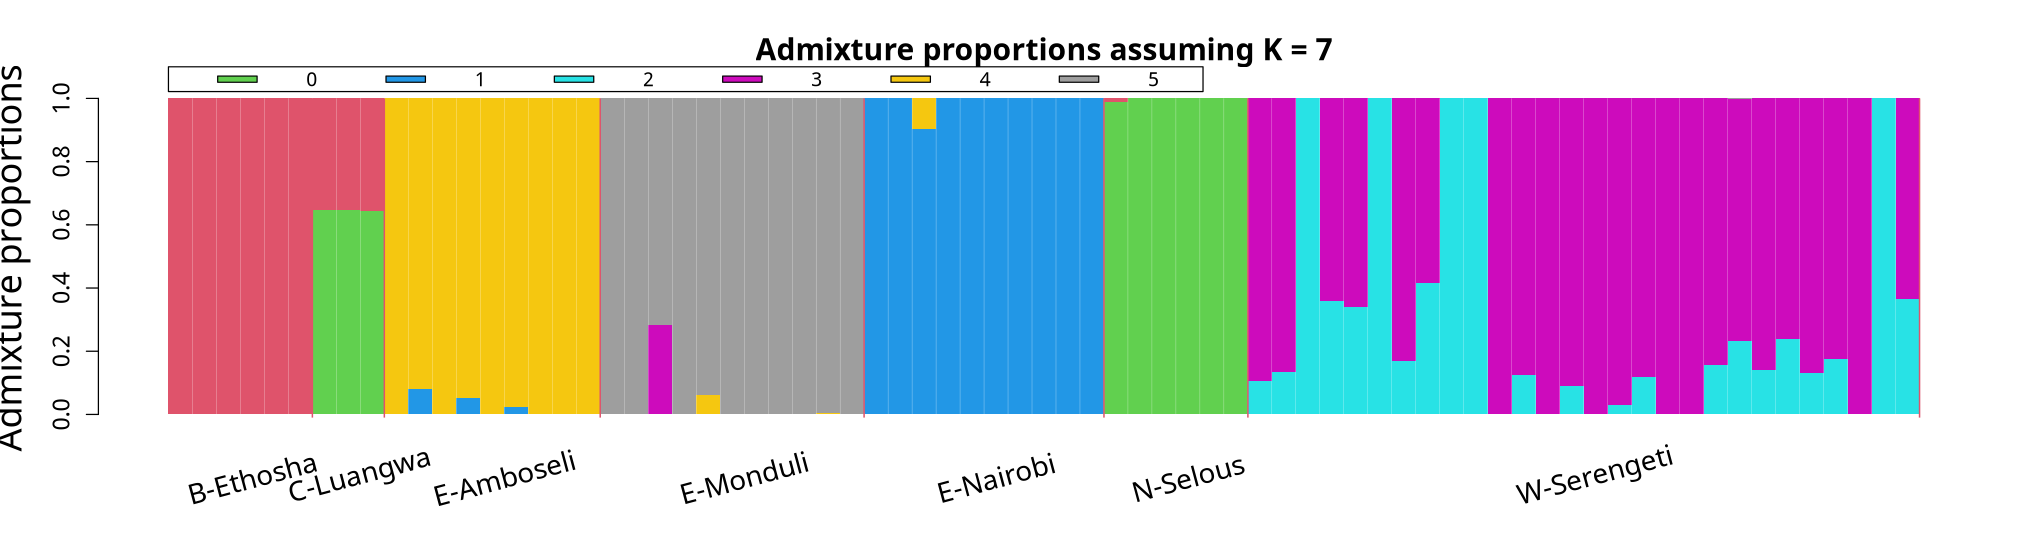

In [39]:
#make plot wide
library("repr")
options(repr.plot.width=17, repr.plot.height=4.5)

#read in code to plot admixture proportions ( plotAdmix function)
source("./visFuns.R")

# Read in inferred admixture proportions
q <- read.table("./blue_wildebeest_noLD.7.Q")

#read in the population labels (first column of fam file)
table(pop <- read.table("./blue_wildebeest_noLD.fam")[,1])

#plot admixture proportions
plotAdmix(q,pop=pop,rotatelab=15,padj=0.15,cex.lab=1.4,col=2:8)
legend(0,1.1,fill=2:8,legend=0:5,hor=T,xpd=T)

 - Does the results look like you expect (why/why not)?
 
 
 There are several hints that the results might be wrong. For example, do you think it is realistic that the 3 Cookson's wildebeest samples ('C-Luangwa') are all truly admixed with exactly the same admixture proportions?
 
 ### EvalAdmix to the rescue
 
To solve this challenge, we can use evalAdmix to diagnose problems with the results of the analysis. This method uses the results from ADMIXTURE to predict the genotypes for each indiviudals, and then try to identify individuals or populations with a bad fit under this ADMIXTURE model with K=7.
 
 

In [40]:

evalAdmix -plink blue_wildebeest_noLD -fname blue_wildebeest_noLD.7.P \
-qname blue_wildebeest_noLD.7.Q -o blue_wildebeest_noLD.7.eval -P 2


evalAdmix version 0.962
evalAdmix -plink blue_wildebeest_noLD -fname blue_wildebeest_noLD.7.P -qname blue_wildebeest_noLD.7.Q -o blue_wildebeest_noLD.7.eval -P 2 
	-> Will assume these are the plink files:
		bed: blue_wildebeest_noLD.bed
		bim: blue_wildebeest_noLD.bim
		fam: blue_wildebeest_noLD.fam
	-> Plink file contains 146632 autosomale SNPs
	-> reading genotypes 	-> Allocated: 0.021 gig memory
 - done 
		->K=7	nSites=146632	nInd=73
opening : blue_wildebeest_noLD.7.Q with x=73 y=7
opening : blue_wildebeest_noLD.7.P with x=146632 y=7
Going to calcualte normal residuals
Finished calculating normal residuals
Correcting frequencies with 2 threads...
Finished, going to write all correlations
Correlation matrix has been written to blue_wildebeest_noLD.7.eval
	[ALL done] cpu-time used =  57.95 sec
	[ALL done] walltime used =  31.00 sec
	[ALL done] results have been outputted to blue_wildebeest_noLD.7.eval
(anders) 


The results from evalAdmixture can be plotted in R. 

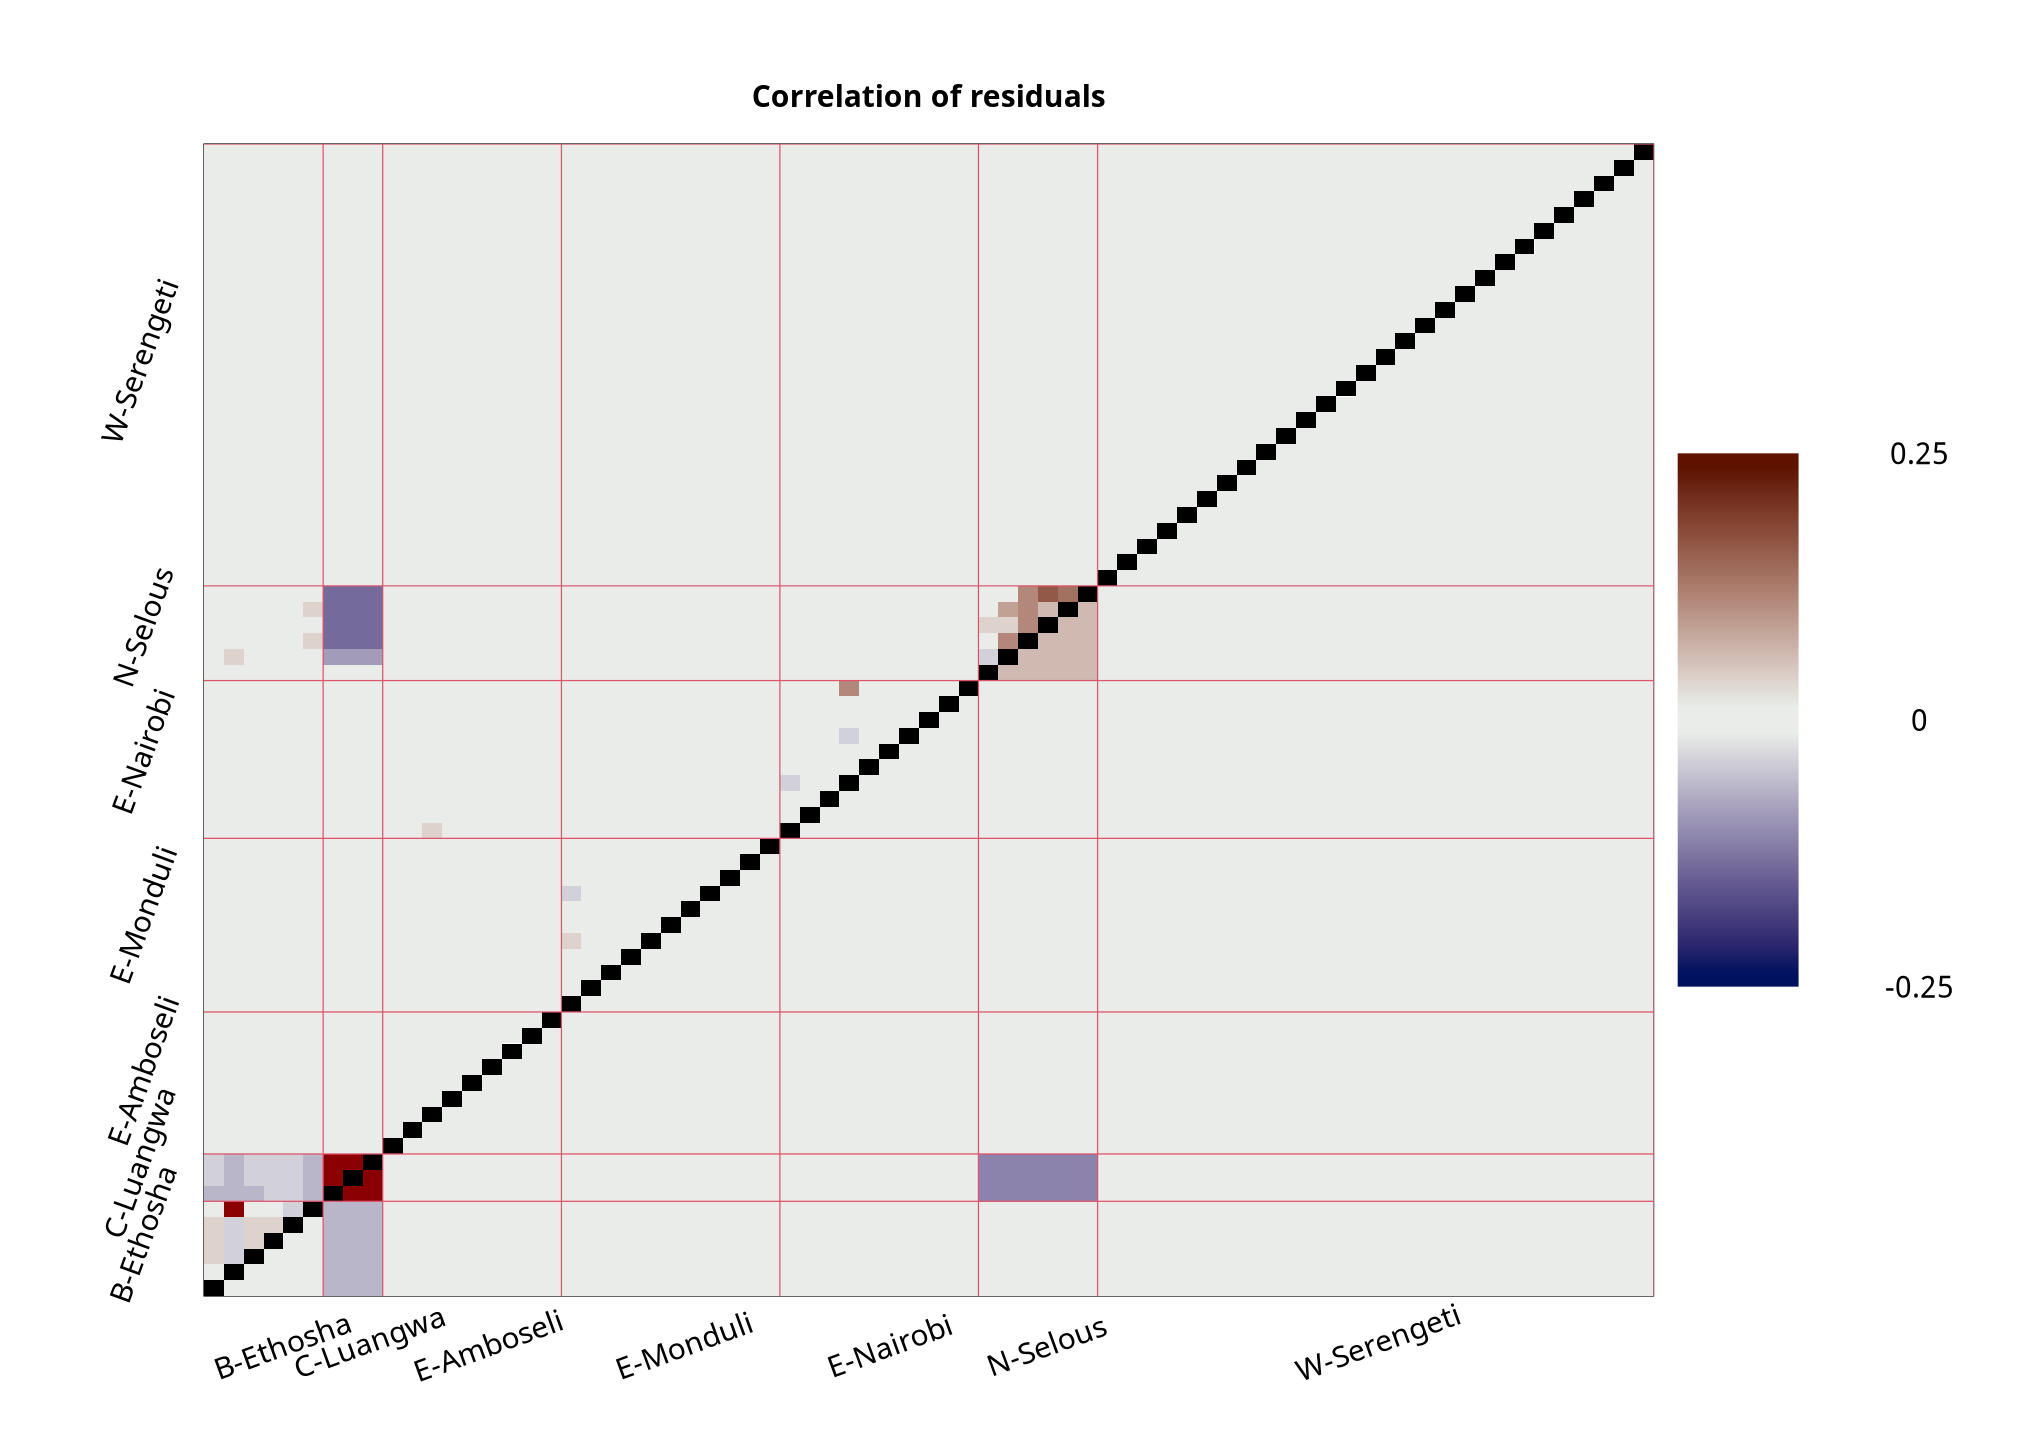

In [41]:

options(repr.plot.width=17, repr.plot.height=12)

r <- as.matrix(read.table("./blue_wildebeest_noLD.7.eval"))
plotCorRes(r, pop=pop, max_z = 0.25,rotatelabpop =20,adjlab = .05)


 - Which population(s) does evalAdmix identify as having a bad fit? 


### Evaluating covergence
There are several possible explanations for why the ADMIXTURE model fit is bad. The two most common reasons are 1) The choice of K is sub-optimal, and 2) the algorithm has not converged to the globally best solution. ADMIXTURE tries to find the combination of parameters than maximizes the log likelihoods. However, the algorithm does not always find the optimal solution when the likelhoood surface is not concave as illustated below.

<img src="https://www.mathsisfun.com/algebra/images/function-max-global.svg" alt="image info" />

To test for convergence (i.e. reason (2) mentioned above), we can test many different starting points. If many different runs with different starting points consistently lead to the same best log likelihood, then ADMIXTURE has very likely found the global optimal soluation. 

To save time, we have pre-run ADMIXTURE using 10 other seeds. The results are found in the folder multiRunK7.




In [42]:
K=7
#mkdir -p multiRunK$K
#for seed in 1 2 3 4 5 6 7 8 9 10
#do
#admixture --seed $seed -j70 blue_wildebeest_noLD.bed $K | tee multiRunK$K/blue_wildebeest_noLD.$K.log_$seed
#mv blue_wildebeest_noLD.$K.Q multiRunK$K/blue_wildebeest_noLD.$K.Q_$seed 
#mv blue_wildebeest_noLD.$K.P multiRunK$K/blue_wildebeest_noLD.$K.P_$seed
#done


ls multiRunK$K

(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) blue_wildebeest_noLD.7.log_1   blue_wildebeest_noLD.7.P_5
blue_wildebeest_noLD.7.log_10  blue_wildebeest_noLD.7.P_6
blue_wildebeest_noLD.7.log_2   blue_wildebeest_noLD.7.P_7
blue_wildebeest_noLD.7.log_3   blue_wildebeest_noLD.7.P_8
blue_wildebeest_noLD.7.log_4   blue_wildebeest_noLD.7.P_9
blue_wildebeest_noLD.7.log_5   blue_wildebeest_noLD.7.Q_1
blue_wildebeest_noLD.7.log_6   blue_wildebeest_noLD.7.Q_10
blue_wildebeest_noLD.7.log_7   blue_wildebeest_noLD.7.Q_2
blue_wildebeest_noLD.7.log_8   blue_wildebeest_noLD.7.Q_3
blue_wildebeest_noLD.7.log_9   blue_wildebeest_noLD.7.Q_4
blue_wildebeest_noLD.7.P_1     blue_wildebeest_noLD.7.Q_5
blue_wildebeest_noLD.7.P_10    blue_wildebeest_noLD.7.Q_6
blue_wildebeest_noLD.7.P_2     blue_wildebeest_noLD.7.Q_7
blue_wildebeest_noLD.7.P_3     blue_wildebeest_noLD.7.Q_8
blue_wildebeest_noLD.7.P_4     blue_wildebeest_noLD.7.Q_9
(anders) 


In [57]:
cat multiRunK7/blue_wildebeest_noLD.7.log_8

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Parallel execution requested.  Will use 70 threads.
Random seed: 8
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 73x146632
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 2.698	Loglikelihood: -1.38404e+07	(delta): 2.01111e+06
2 (EM) 	Elapsed: 2.661	Loglikelihood: -1

We can extract the likelihoods for each of the 10 runs started with different seeds, and sort them according to their values. 

In [43]:

grep ^Loglikelihood multiRunK7/blue_wildebeest_noLD.7.log* | sort -k 2 -t " "


multiRunK7/blue_wildebeest_noLD.7.log_4:Loglikelihood: -11002356.057361
multiRunK7/blue_wildebeest_noLD.7.log_10:Loglikelihood: -11002356.136544
multiRunK7/blue_wildebeest_noLD.7.log_5:Loglikelihood: -11002356.179200
multiRunK7/blue_wildebeest_noLD.7.log_1:Loglikelihood: -11002356.346185
multiRunK7/blue_wildebeest_noLD.7.log_7:Loglikelihood: -11002356.647261
multiRunK7/blue_wildebeest_noLD.7.log_9:Loglikelihood: -11038309.567975
multiRunK7/blue_wildebeest_noLD.7.log_6:Loglikelihood: -11040096.005803
multiRunK7/blue_wildebeest_noLD.7.log_8:Loglikelihood: -11044864.243032
multiRunK7/blue_wildebeest_noLD.7.log_3:Loglikelihood: -11092586.467684
multiRunK7/blue_wildebeest_noLD.7.log_2:Loglikelihood: -11094501.555084
(anders) 


 - Which seed has the highest likelihood?
 - Your first run used seed 0. Did your run find a local or global maximum (find the likeihood in the bottom of the output from the program when you ran it first, above).
 
 
Let's try to plot the results from the seed with the best likelihood.

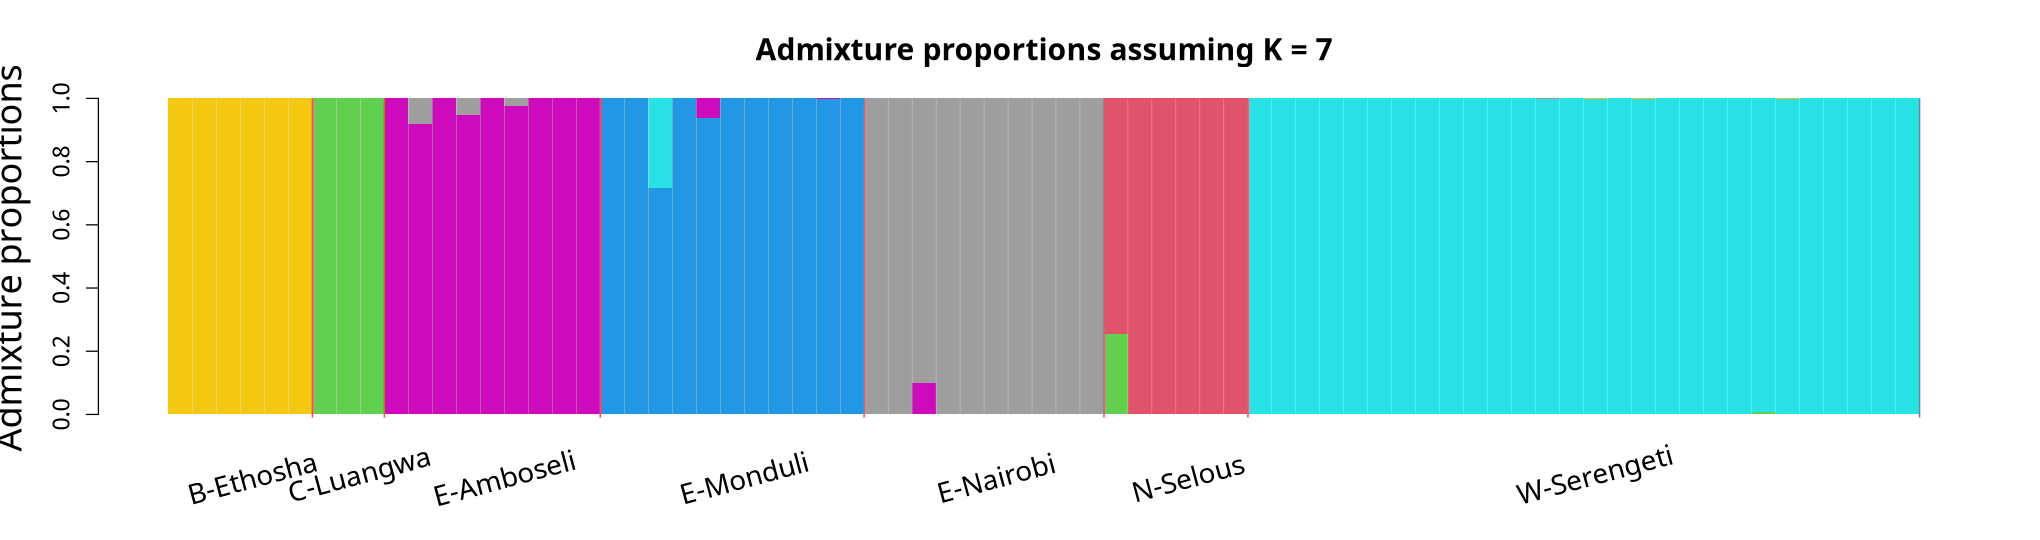

In [44]:

options(repr.plot.width=17, repr.plot.height=4.5)


#read in code to plot admixture proportions ( plotAdmix function)
source("./visFuns.R")


# Read in inferred admixture proportions
q <- read.table("./multiRunK7/blue_wildebeest_noLD.7.Q_4")

#read in the population labels (first column of fam file)
pop <- read.table("./blue_wildebeest_noLD.fam")[,1]

#make the plot. 
plotAdmix(q,pop=pop,rotatelab=15,padj=0.15,cex.lab=1.4,col=2:8)

 - Did the results improve?
 - How many individuals can you find that are admixted between two subspecies?
 
 
 Let's use evalAdmix to see if the model fit is better now.

In [45]:

evalAdmix -plink blue_wildebeest_noLD -fname ./multiRunK7/blue_wildebeest_noLD.7.P_4 \
-qname ./multiRunK7/blue_wildebeest_noLD.7.Q_4 -o blue_wildebeest_noLD.7.eval_4 -P 2


evalAdmix version 0.962
evalAdmix -plink blue_wildebeest_noLD -fname ./multiRunK7/blue_wildebeest_noLD.7.P_4 -qname ./multiRunK7/blue_wildebeest_noLD.7.Q_4 -o blue_wildebeest_noLD.7.eval_4 -P 2 
	-> Will assume these are the plink files:
		bed: blue_wildebeest_noLD.bed
		bim: blue_wildebeest_noLD.bim
		fam: blue_wildebeest_noLD.fam
	-> Plink file contains 146632 autosomale SNPs
	-> reading genotypes 	-> Allocated: 0.021 gig memory
 - done 
		->K=7	nSites=146632	nInd=73
opening : ./multiRunK7/blue_wildebeest_noLD.7.Q_4 with x=73 y=7
opening : ./multiRunK7/blue_wildebeest_noLD.7.P_4 with x=146632 y=7
Going to calcualte normal residuals
Finished calculating normal residuals
Correcting frequencies with 2 threads...
Finished, going to write all correlations
Correlation matrix has been written to blue_wildebeest_noLD.7.eval_4
	[ALL done] cpu-time used =  59.03 sec
	[ALL done] walltime used =  32.00 sec
	[ALL done] results have been outputted to blue_wildebeest_noLD.7.eval_4
(anders) 


Let's plot the results

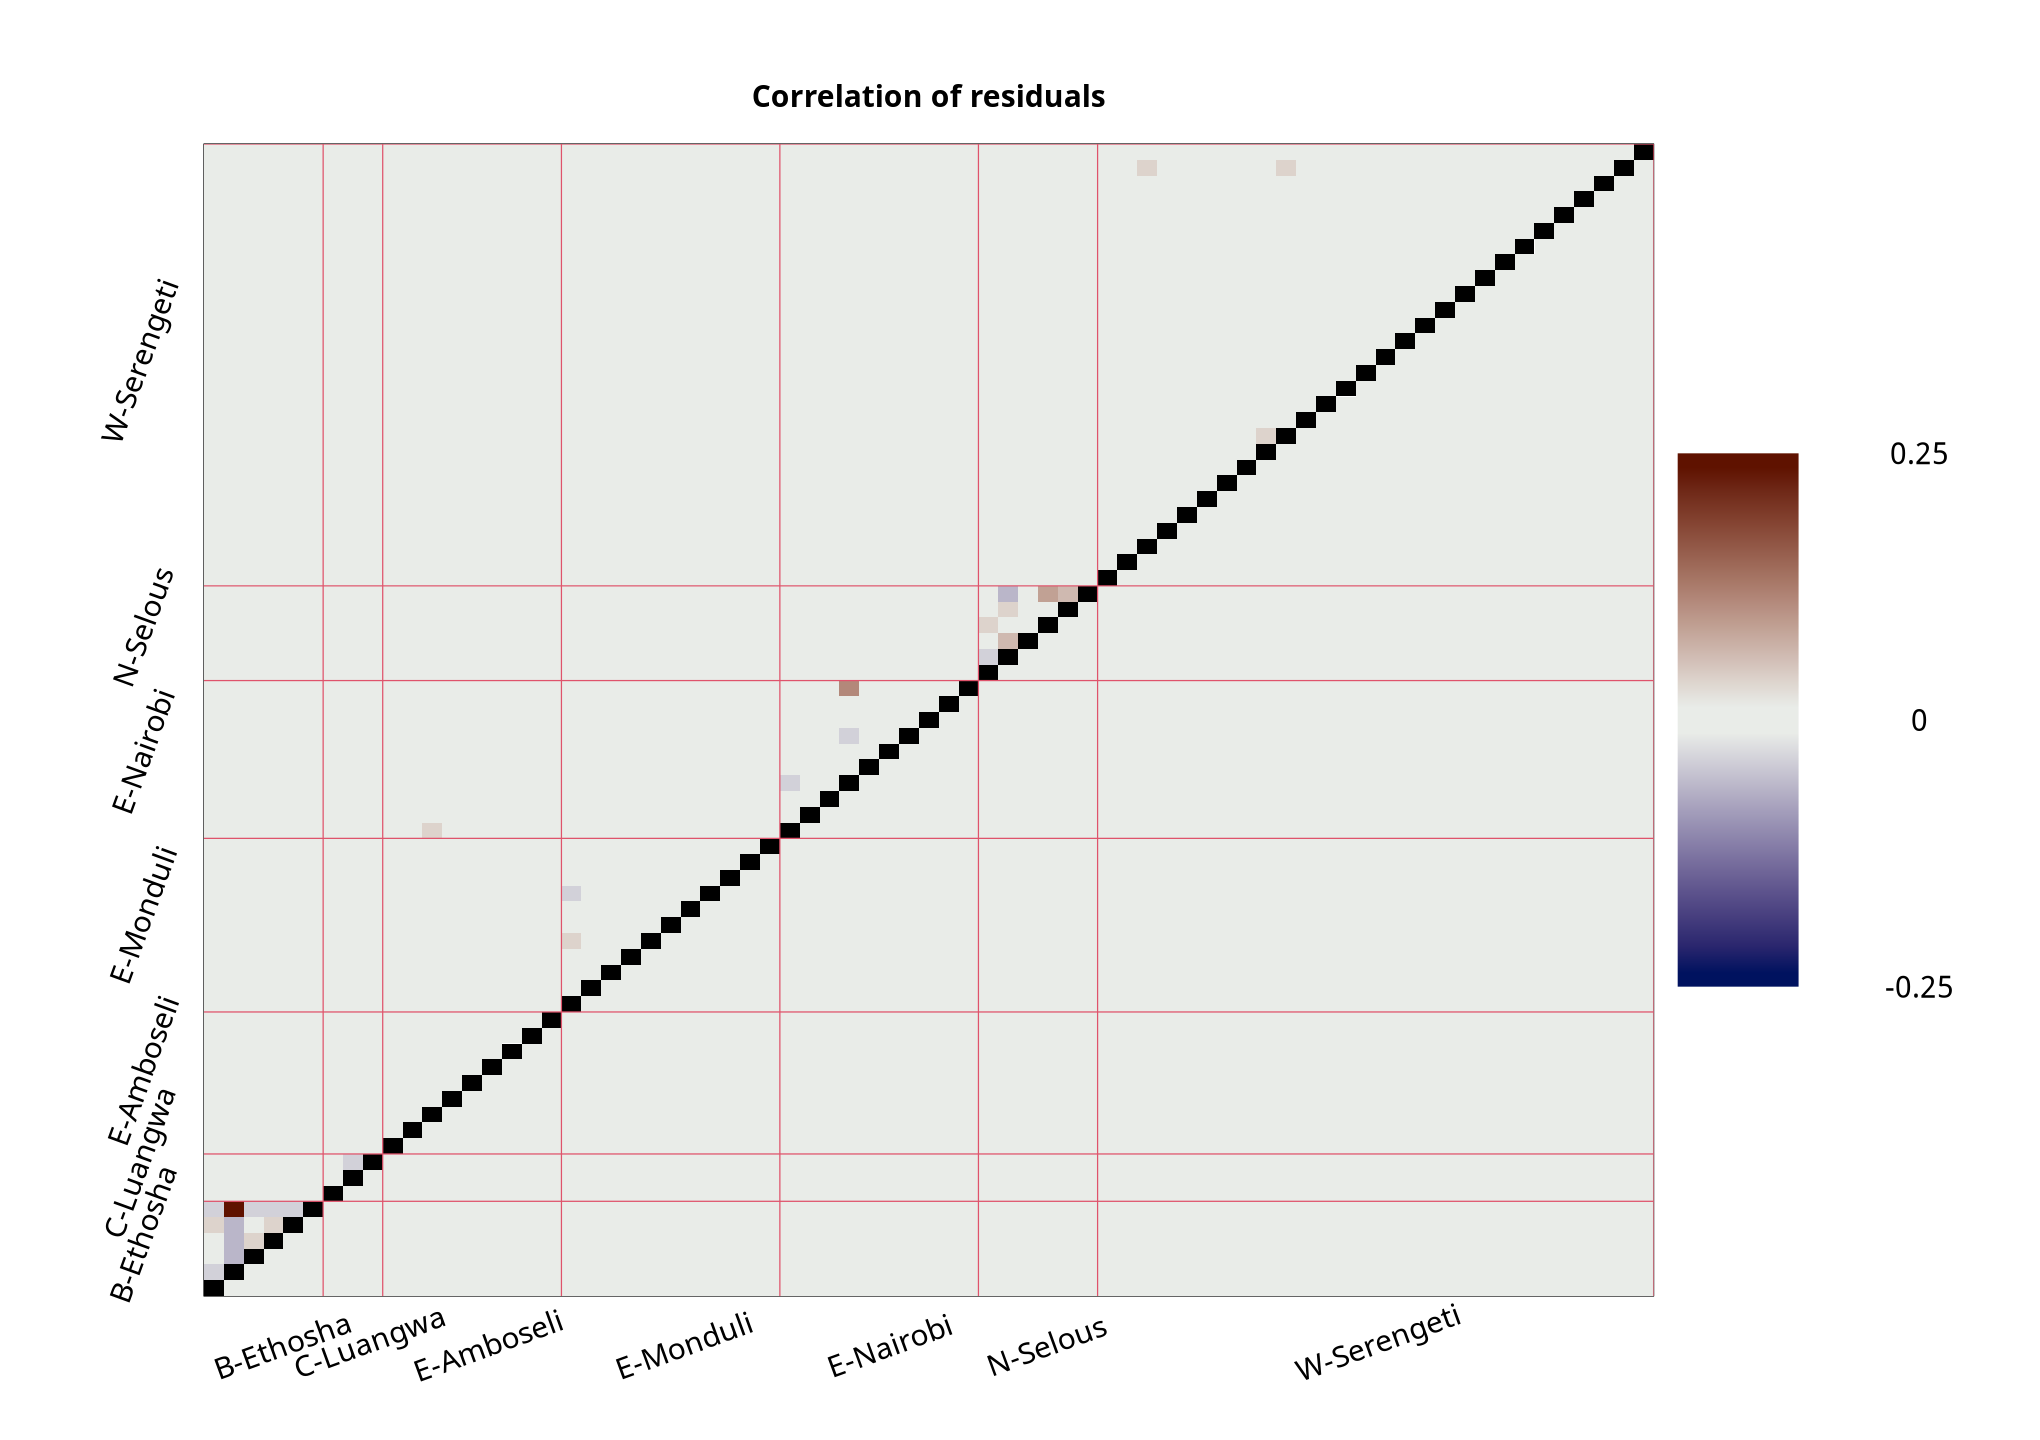

In [46]:
#make plot wide
library("repr")
options(repr.plot.width=17, repr.plot.height=12)

#read in code to plot admixture proportions ( plotAdmix function)
source("./visFuns.R")

#read in the population labels (first column of fam file)
pop <- read.table("./blue_wildebeest_noLD.fam")[,1]

r <- as.matrix(read.table("./blue_wildebeest_noLD.7.eval_4"))
plotCorRes(r, pop=pop, max_z = 0.25,rotatelabpop =20,adjlab = .05)


 - How good is the fit this time?
 - There are some few remaining pairs of individuals with a strong positive correlation. What do you think is the reason?
 
 # Bonus exercise (only if you have time)
 
 ### Running ADMIXTURE for multiple K
 
 
 This would take some time, so we have pre-computed it using the code below using 3 seeds per K value.

In [47]:
 
#mkdir -p allK

#for K in 1 2 3 4 5 6 7
#do
#  for seed in 1 2 3 
#  do
#    admixture --seed $seed -j70 blue_wildebeest_noLD.bed $K | tee allK/blue_wildebeest_noLD.$K.log_$seed
#    mv blue_wildebeest_noLD.$K.Q allK/blue_wildebeest_noLD.$K.Q_$seed 
#    mv blue_wildebeest_noLD.$K.P allK/blue_wildebeest_noLD.$K.P_$seed
#  done
#done


ls allK/

(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) blue_wildebeest_noLD.2.log_1  blue_wildebeest_noLD.6.log_3
blue_wildebeest_noLD.2.log_2  blue_wildebeest_noLD.6.P_1
blue_wildebeest_noLD.2.log_3  blue_wildebeest_noLD.6.P_2
blue_wildebeest_noLD.2.P_1    blue_wildebeest_noLD.6.P_3
blue_wildebeest_noLD.2.P_2    blue_wildebeest_noLD.6.Q_1
blue_wildebeest_noLD.2.P_3    blue_wildebeest_noLD.6.Q_2
blue_wildebeest_noLD.2.Q_1    blue_wildebeest_noLD.6.Q_3
blue_wildebeest_noLD.2.Q_2    blue_wildebeest_noLD.7.log_1
blue_wildebeest_noLD.2.Q_3    blue_wildebeest_noLD.7.log_10
blue_wildebeest_noLD.3.log_1  blue_wildebeest_noLD.7.log_2
blue_wildebeest_noLD.3.log_2  blue_wildebeest_noLD.7.log_3
blue_wildebeest_noLD.3.log_3  blue_wildebeest_noLD.7.log_4
blue_wildebeest_noLD.3.P_1    blue_wildebeest_noLD.7.log_5
blue_wildebeest_noLD.3.P_2    blue_wildebeest_noLD.7.log_6
blue_wildebeest_noLD.3.P_3    blue_wildebeest_noLD.7.log_7
blue_wild


We can plot the results in R.


[1] "./allK//blue_wildebeest_noLD.2.Q_1"  "./allK//blue_wildebeest_noLD.3.Q_1" 
[3] "./allK//blue_wildebeest_noLD.4.Q_1"  "./allK//blue_wildebeest_noLD.5.Q_1" 
[5] "./allK//blue_wildebeest_noLD.6.Q_1"  "./allK//blue_wildebeest_noLD.7.Q_1" 
[7] "./allK//blue_wildebeest_noLD.7.Q_10"
K=2  3  N perm 2 
N perm 2 
N perm 2 
4  N perm 6 
N perm 6 
N perm 6 
N perm 6 
5  N perm 24 
N perm 24 
N perm 24 
N perm 24 
N perm 24 
6  N perm 120 
N perm 120 
N perm 120 
N perm 120 
N perm 120 
N perm 120 
7  N perm 720 
N perm 720 
N perm 720 
N perm 720 
N perm 720 
N perm 720 
N perm 720 


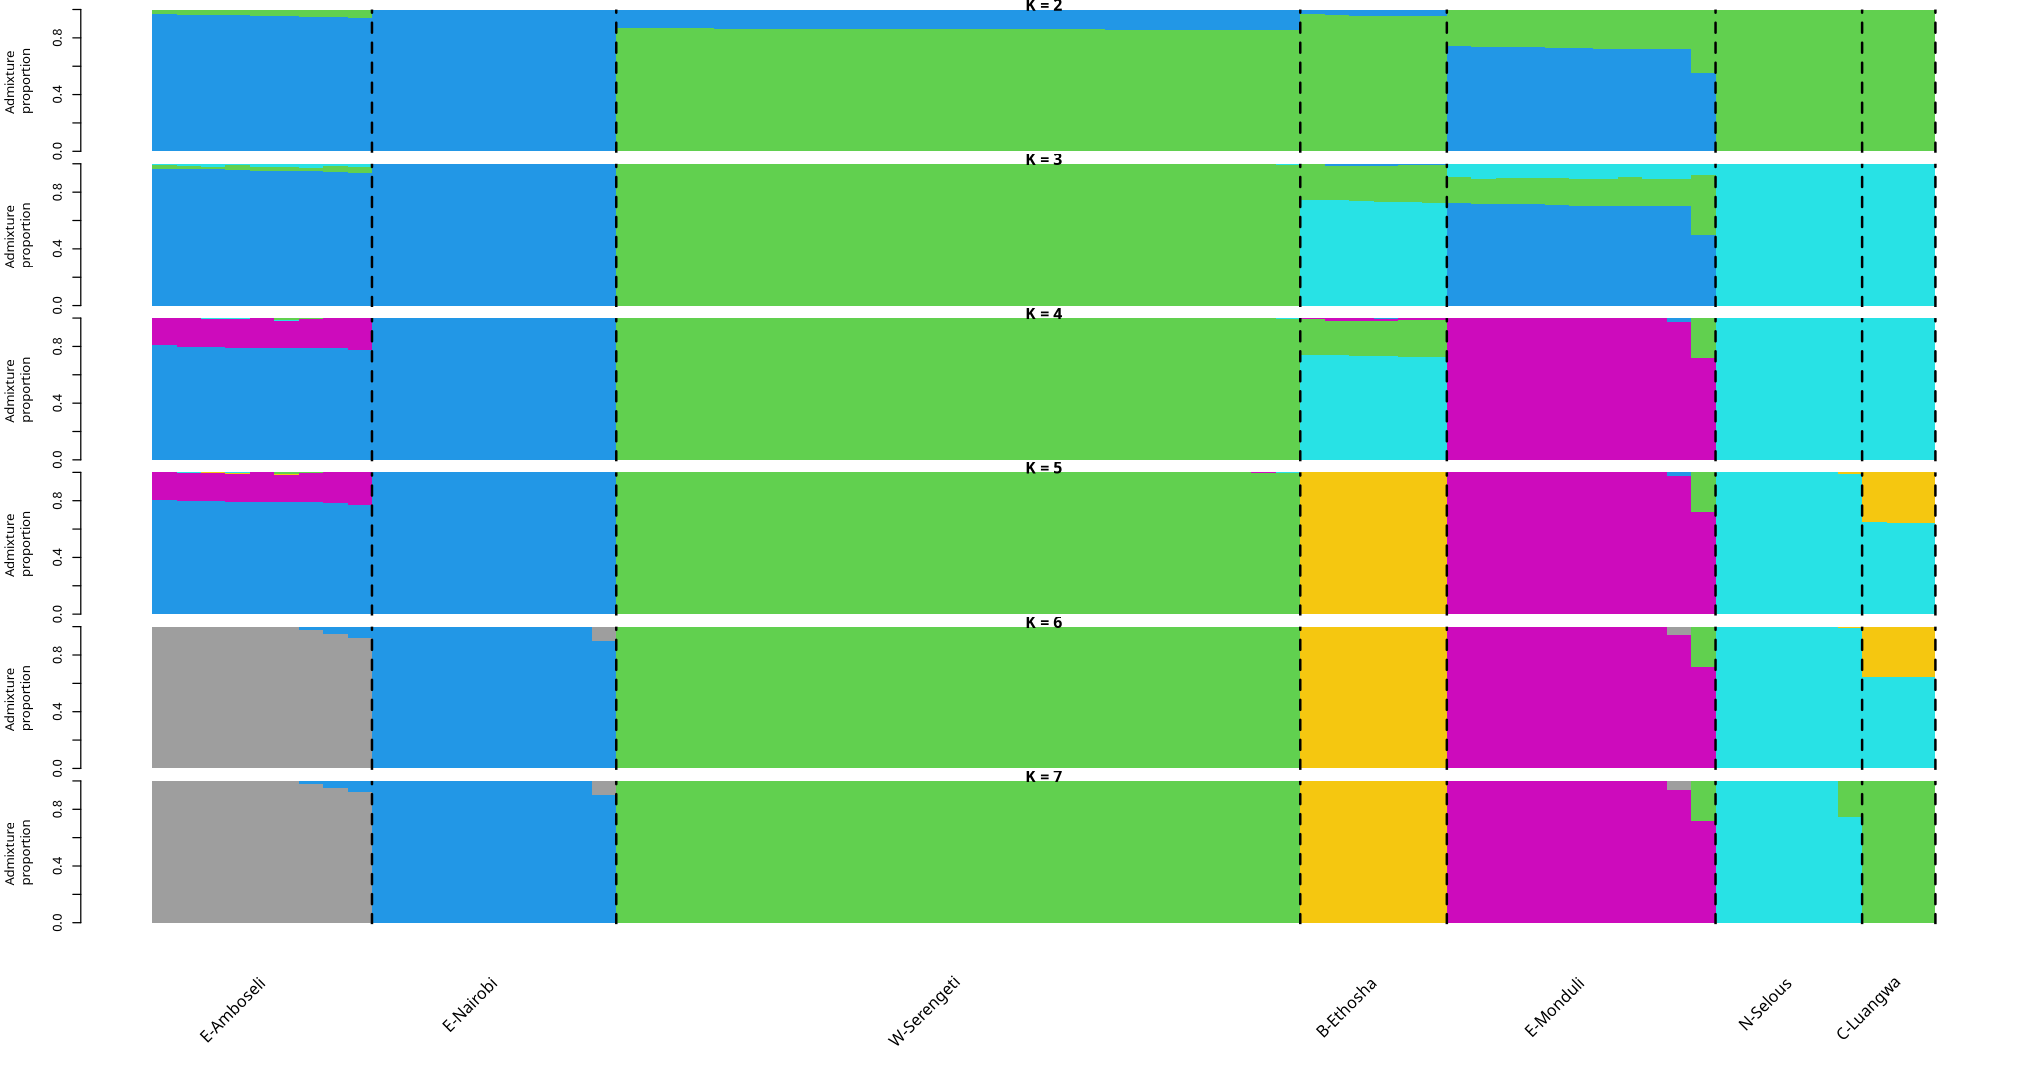

In [48]:

options(repr.plot.width=17, repr.plot.height=9)

l<-list.files("./allK/",full=TRUE,pattern="Q_1")
files<-sort(l)
print(files)
# possible K
Kall <- 2:7

## read Qs
allQ <- list()
for(K in Kall)
    allQ[[K]]<-t(read.table(files[K-min(Kall)+1]))


source("./admixFun.R")

pop <- read.table("./blue_wildebeest_noLD.fam")[,1]
palette(palette()[-1])
plotMulti(allQ,Kall=Kall,as.factor(pop))

 - What determines the order at which populations get their own ancestry compoment? In other words, is there a logic to which populations distinguishable at lower K?
- Which K is the best one?
 
 Lets use evalAdmix to evalute the fit for each choice of K


In [49]:
K=2

for K in 1 2 3 4 5 6 7
  do
    echo ---- Running for K=$K -----------------------
    evalAdmix -plink blue_wildebeest_noLD -fname ./allK/blue_wildebeest_noLD.$K.P_1 \
    -qname ./allK/blue_wildebeest_noLD.$K.Q_1 -o blue_wildebeest_noLD.$K.eval_1 -P 2
  done

(anders) (anders) ---- Running for K=1 -----------------------
evalAdmix version 0.962
evalAdmix -plink blue_wildebeest_noLD -fname ./allK/blue_wildebeest_noLD.1.P_1 -qname ./allK/blue_wildebeest_noLD.1.Q_1 -o blue_wildebeest_noLD.1.eval_1 -P 2 
can't open:./allK/blue_wildebeest_noLD.1.Q_1
---- Running for K=2 -----------------------
evalAdmix version 0.962
evalAdmix -plink blue_wildebeest_noLD -fname ./allK/blue_wildebeest_noLD.2.P_1 -qname ./allK/blue_wildebeest_noLD.2.Q_1 -o blue_wildebeest_noLD.2.eval_1 -P 2 
	-> Will assume these are the plink files:
		bed: blue_wildebeest_noLD.bed
		bim: blue_wildebeest_noLD.bim
		fam: blue_wildebeest_noLD.fam
	-> Plink file contains 146632 autosomale SNPs
	-> reading genotypes 	-> Allocated: 0.021 gig memory
 - done 
		->K=2	nSites=146632	nInd=73
opening : ./allK/blue_wildebeest_noLD.2.Q_1 with x=73 y=2
opening : ./allK/blue_wildebeest_noLD.2.P_1 with x=146632 y=2
Going to calcualte normal residuals
Finished calculating normal residuals
Correcti

Lets plot the results in R

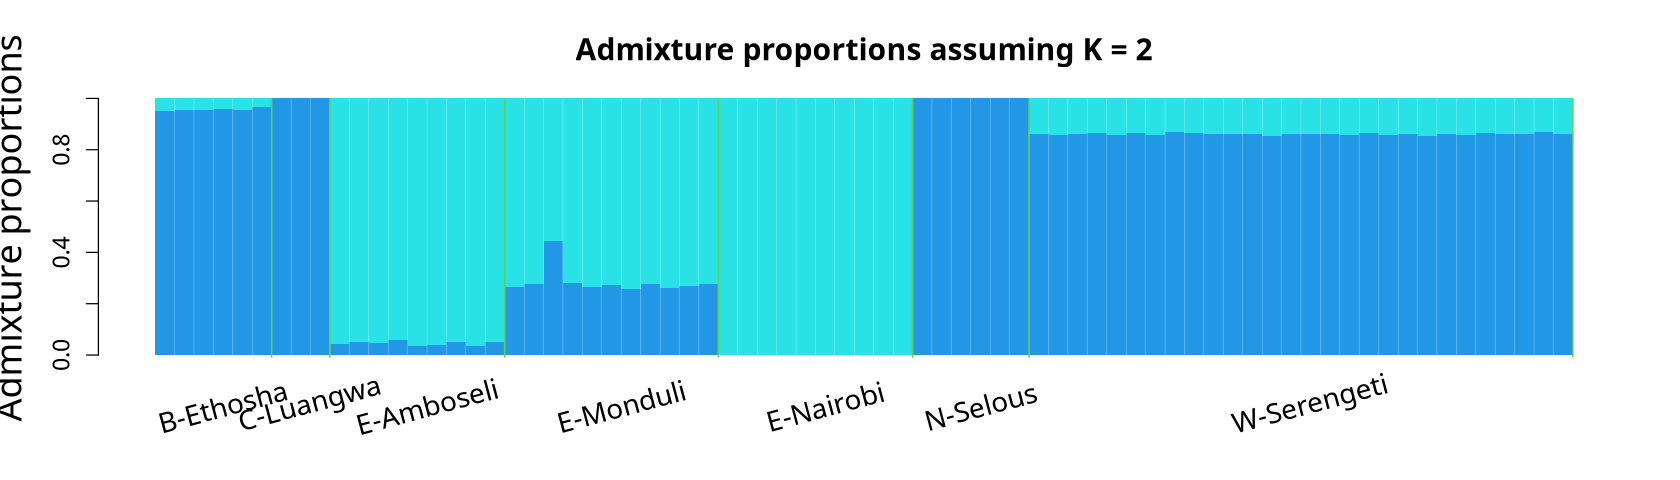

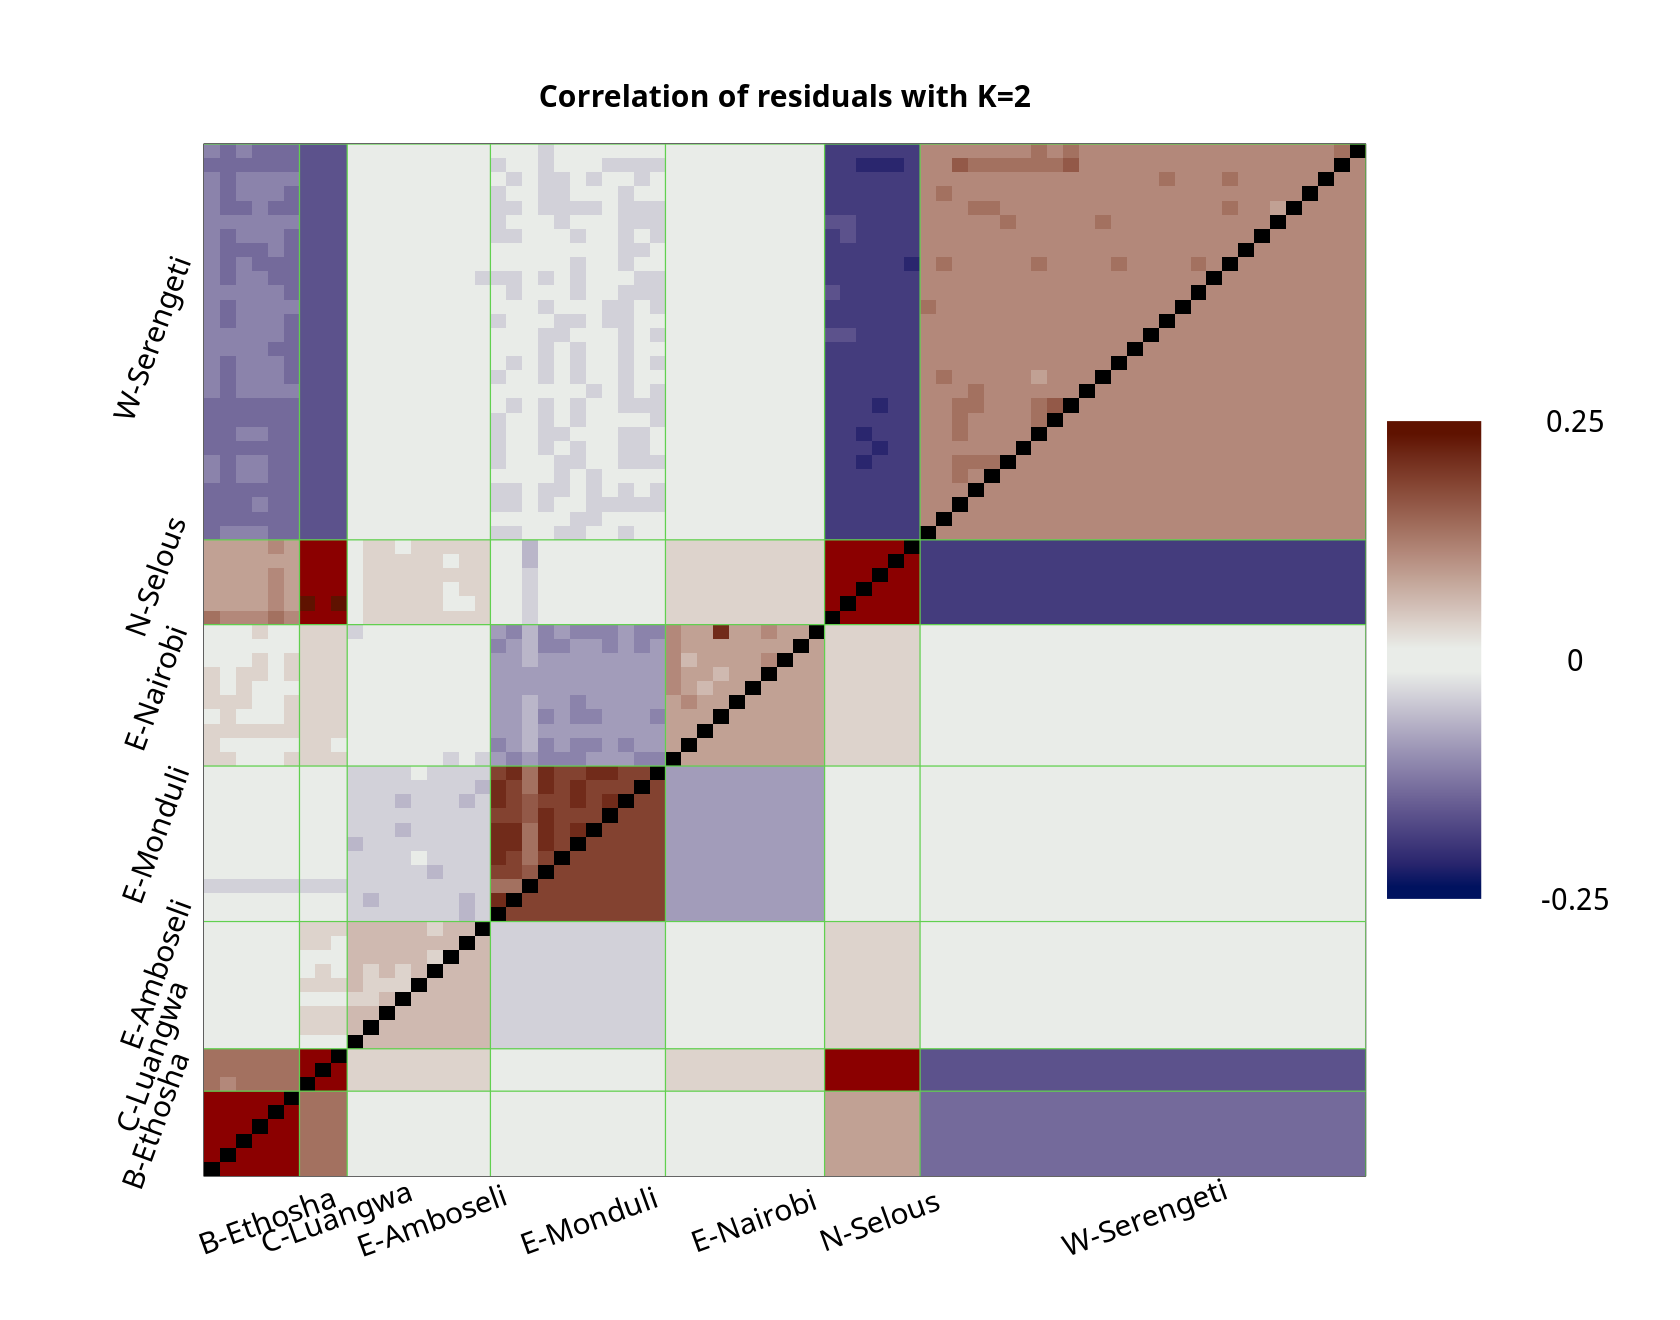

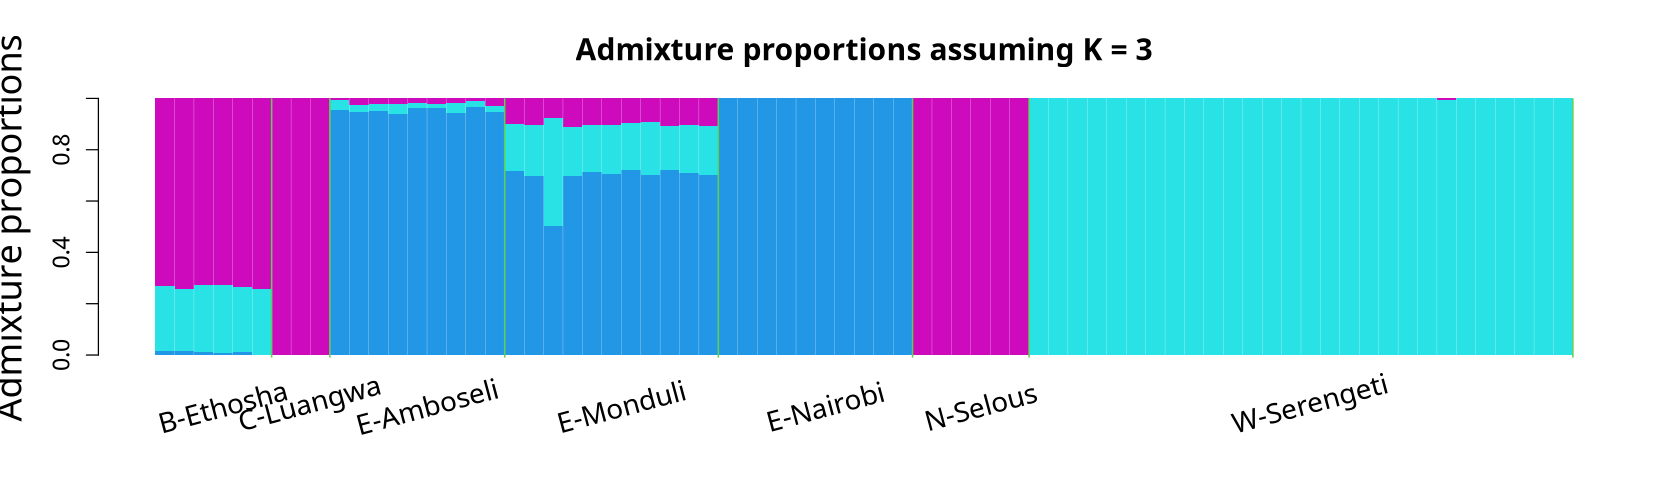

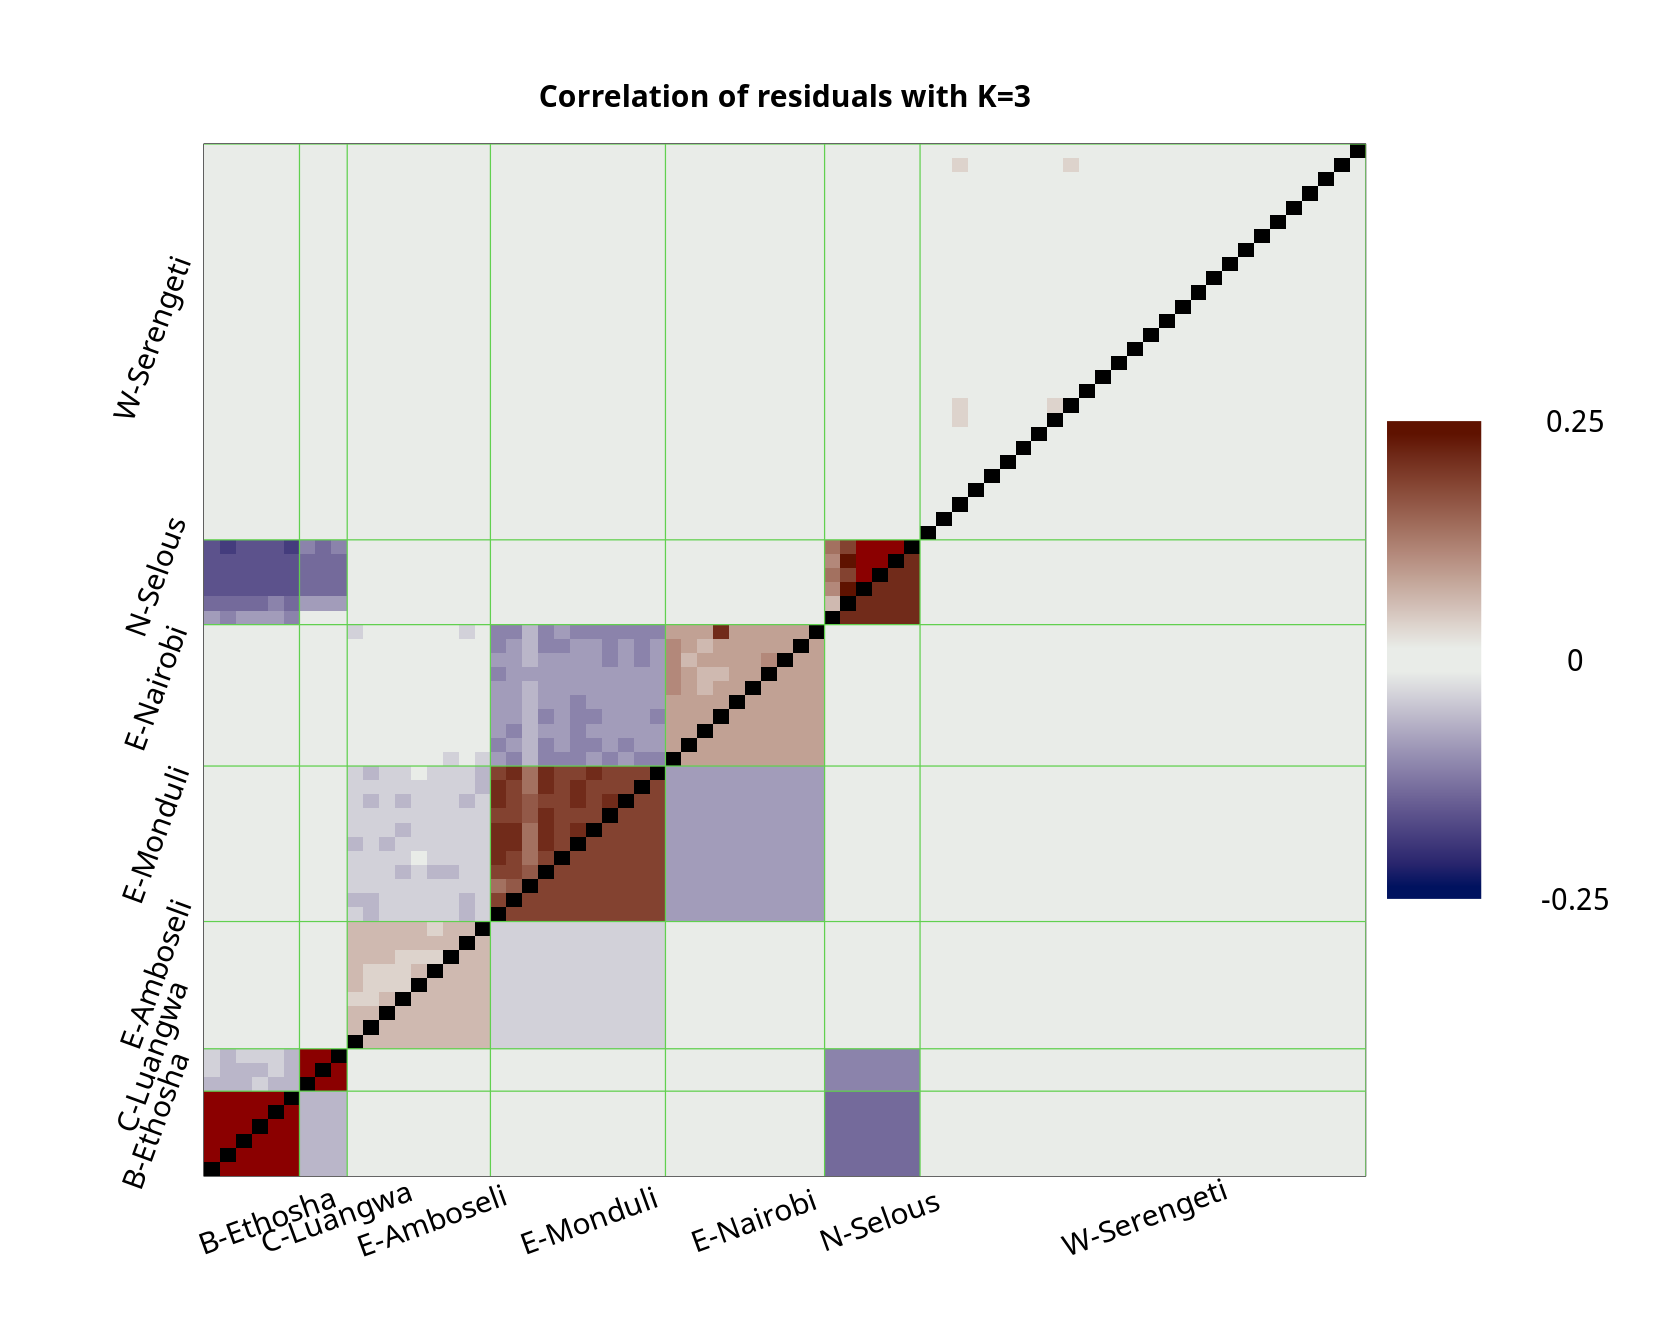

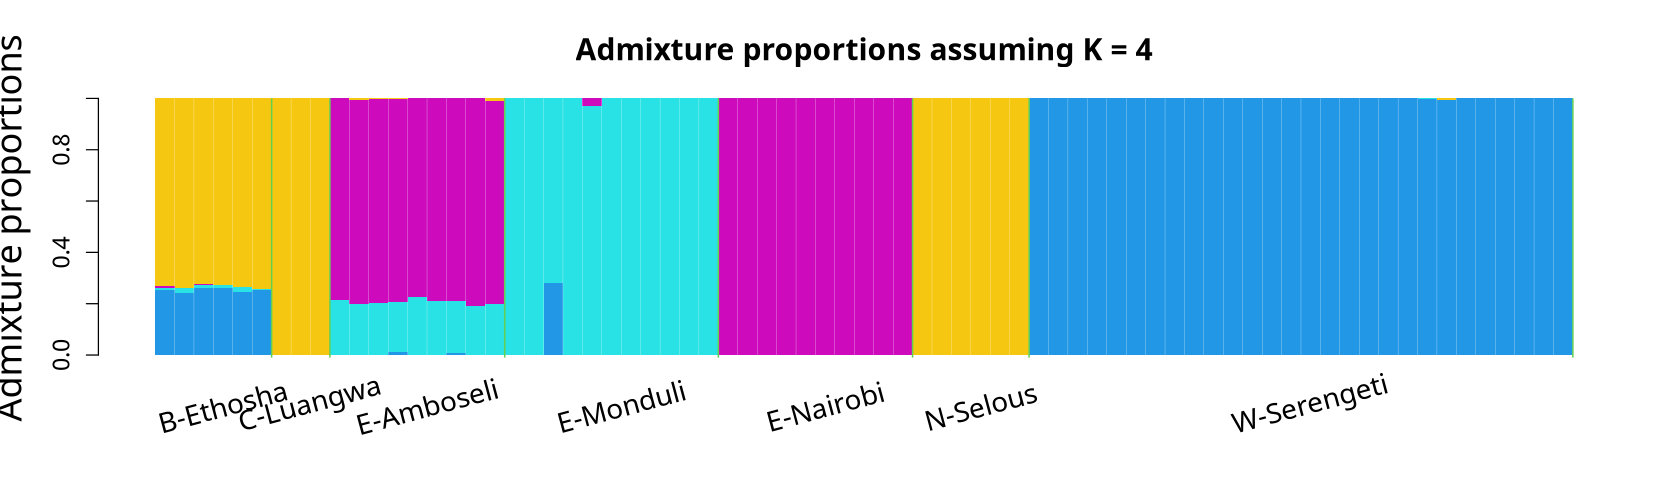

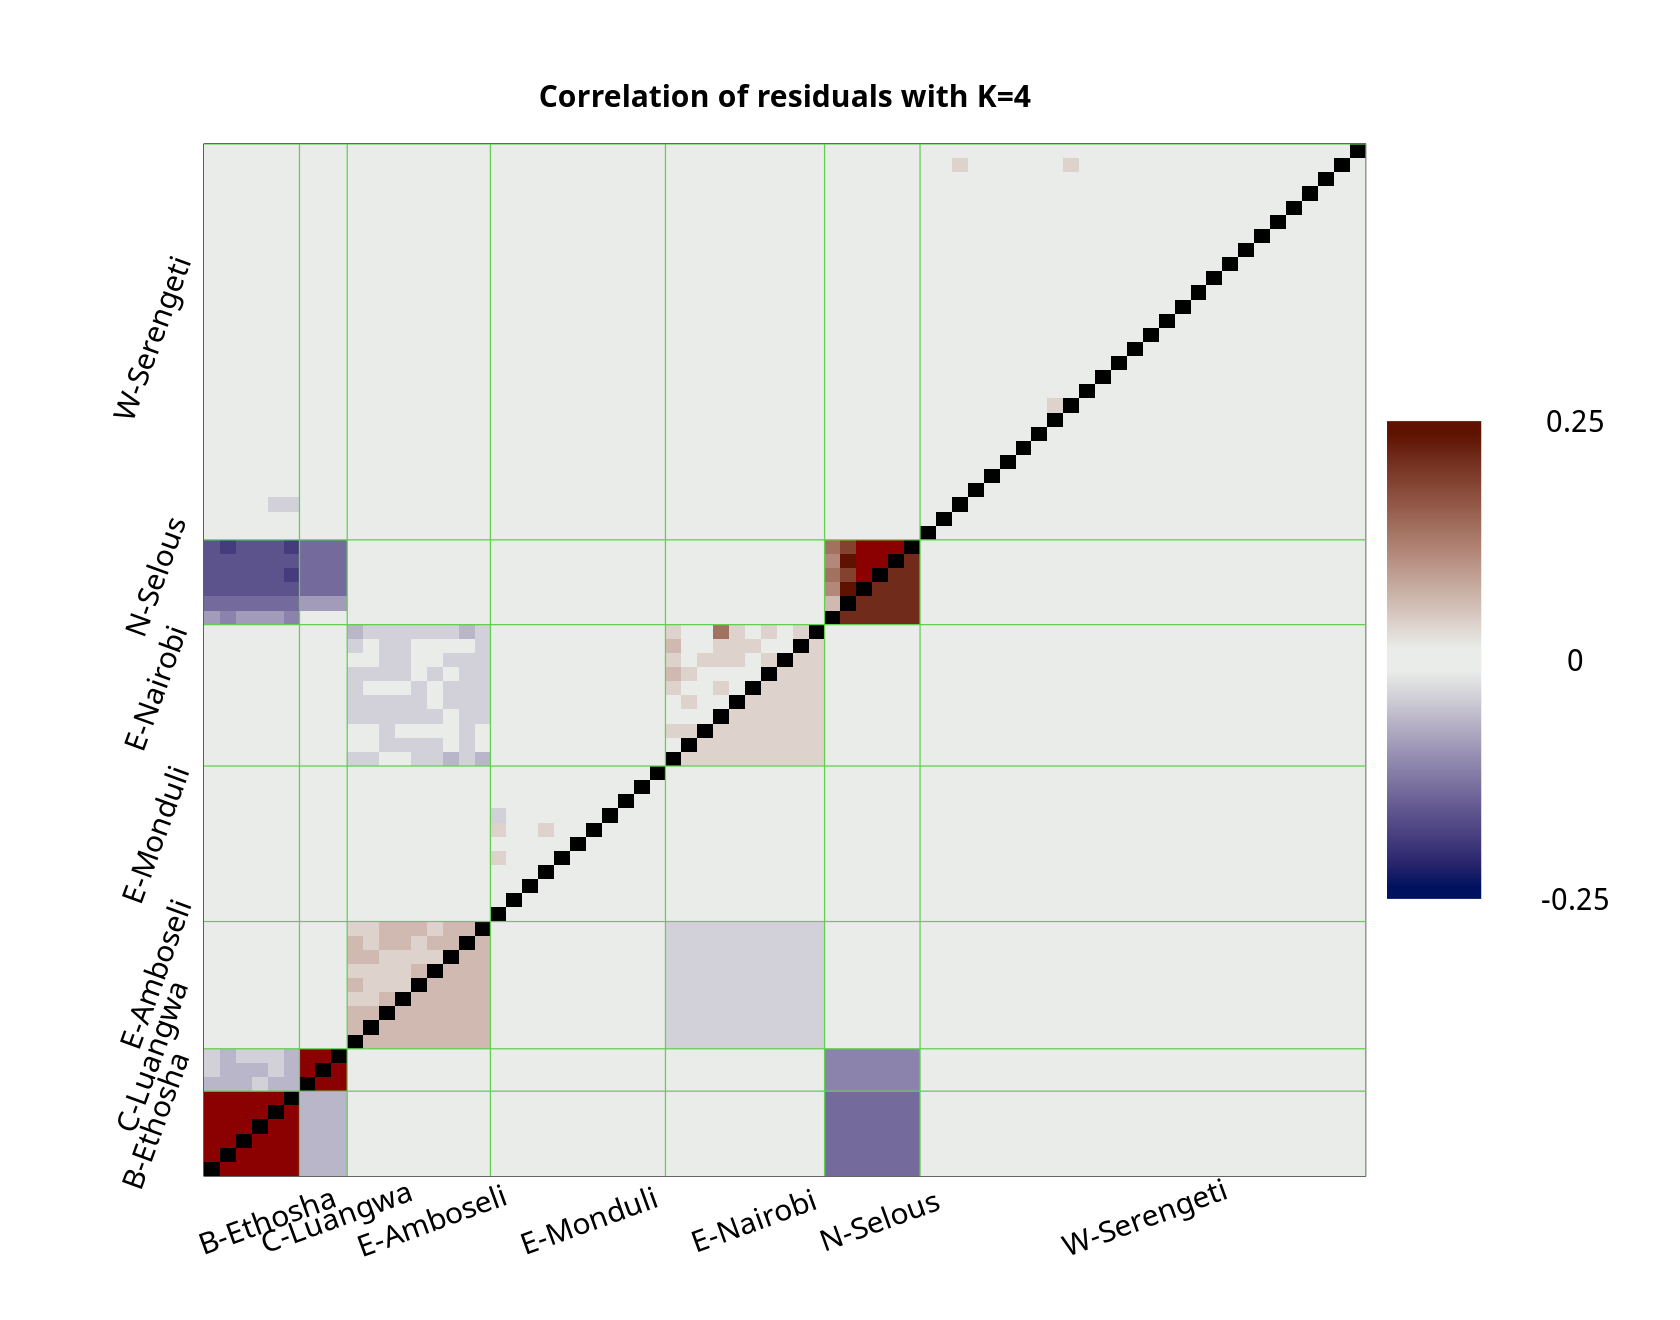

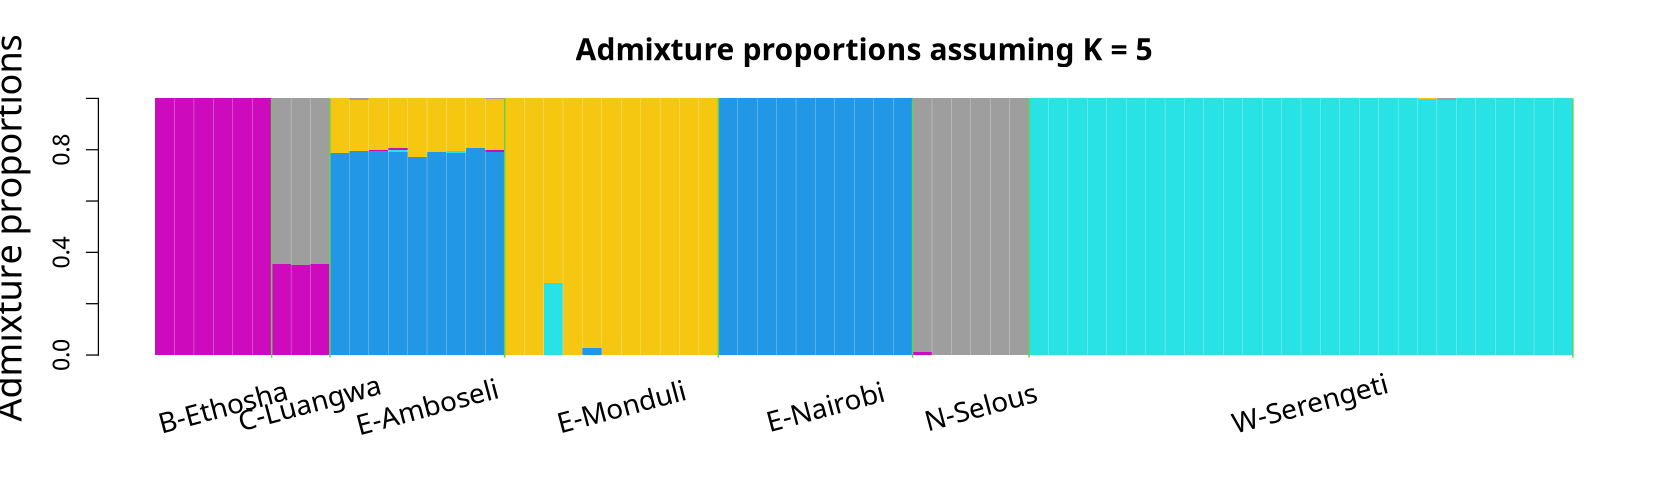

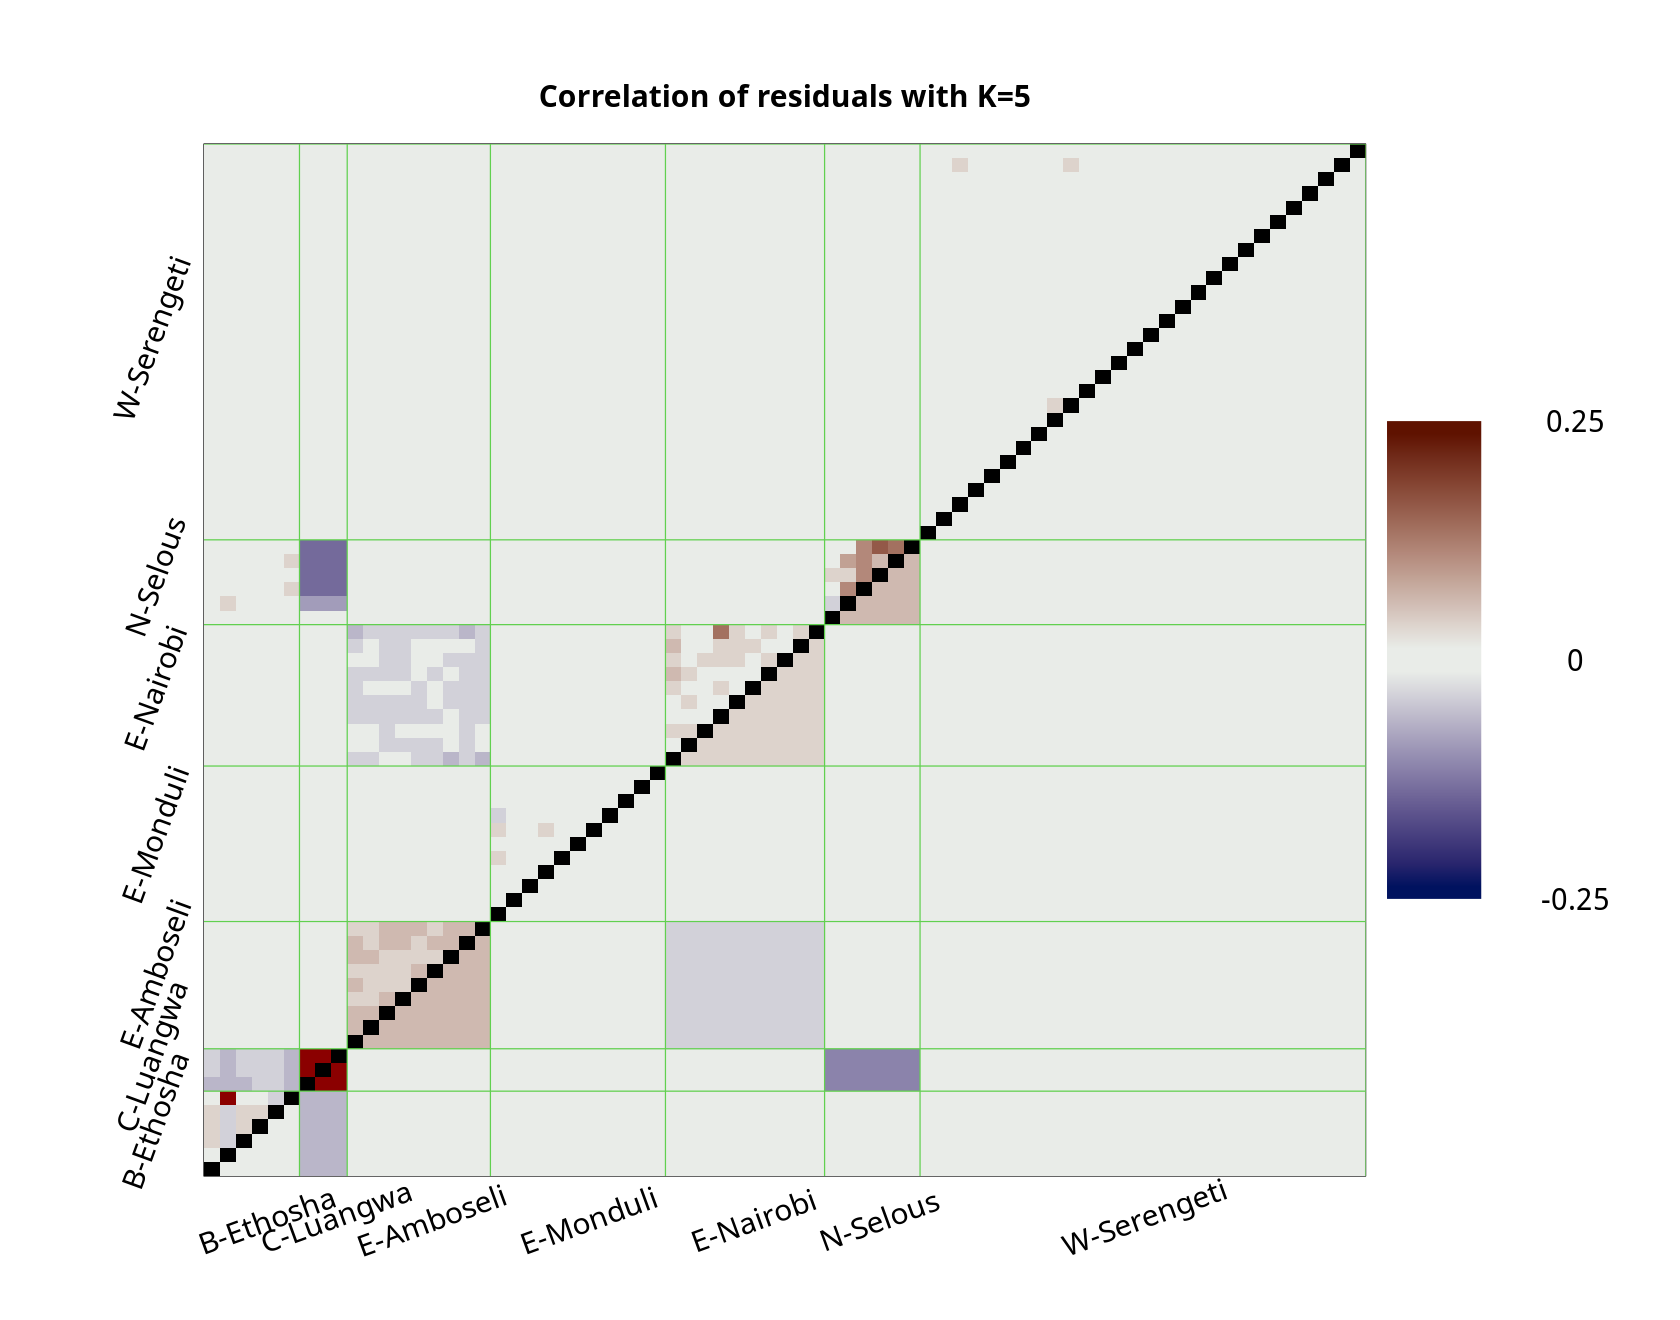

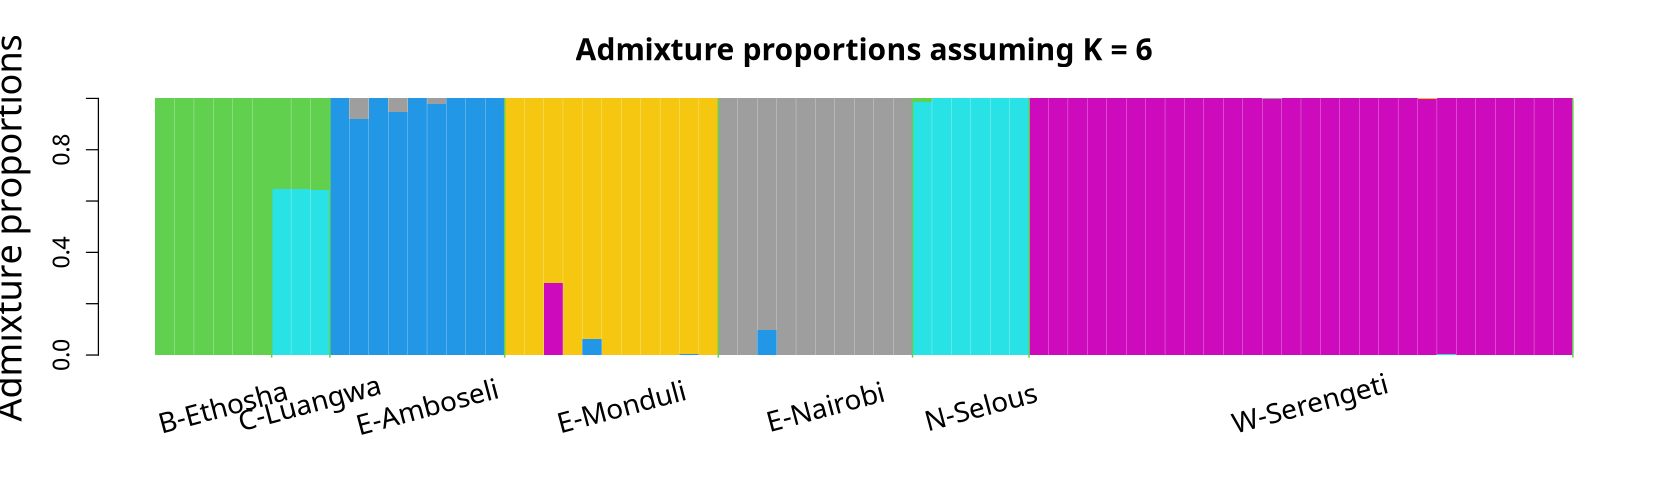

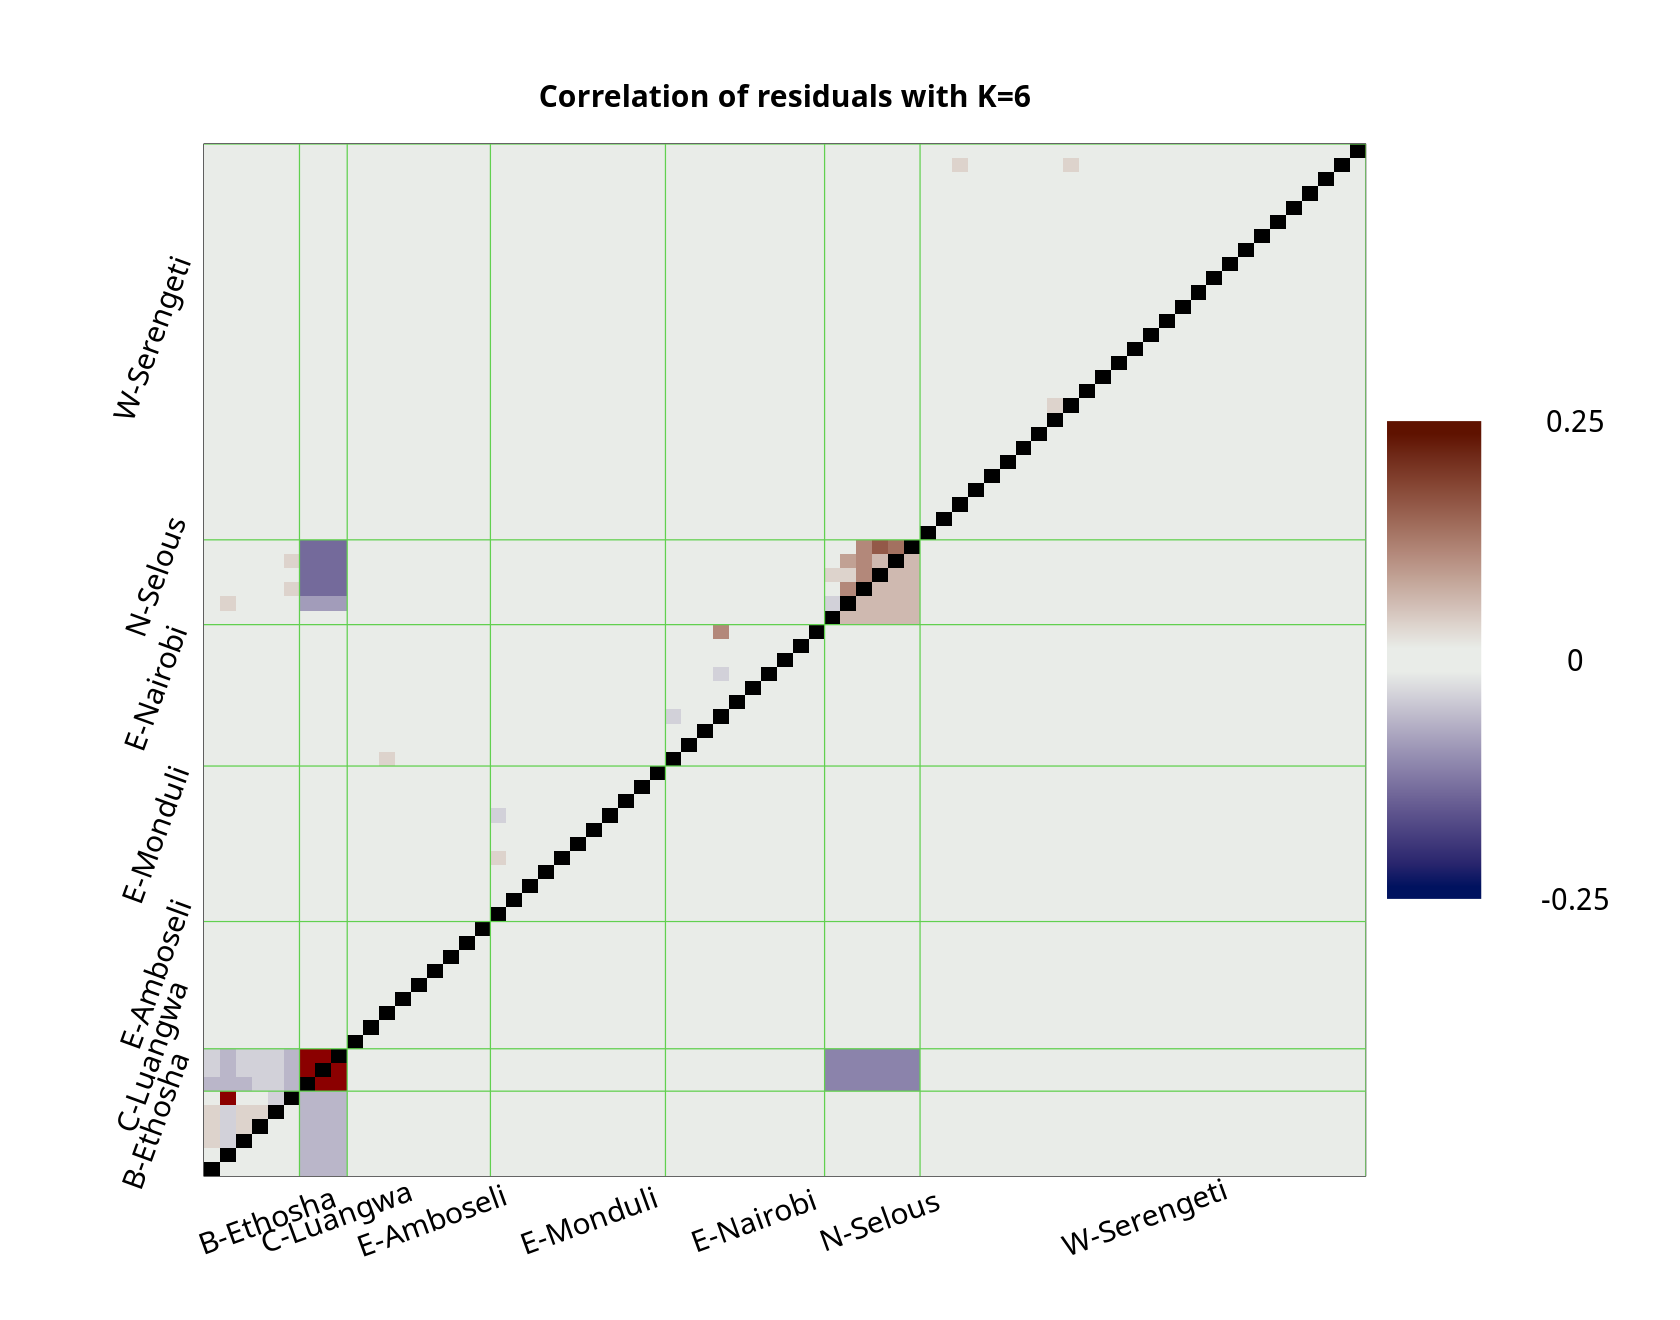

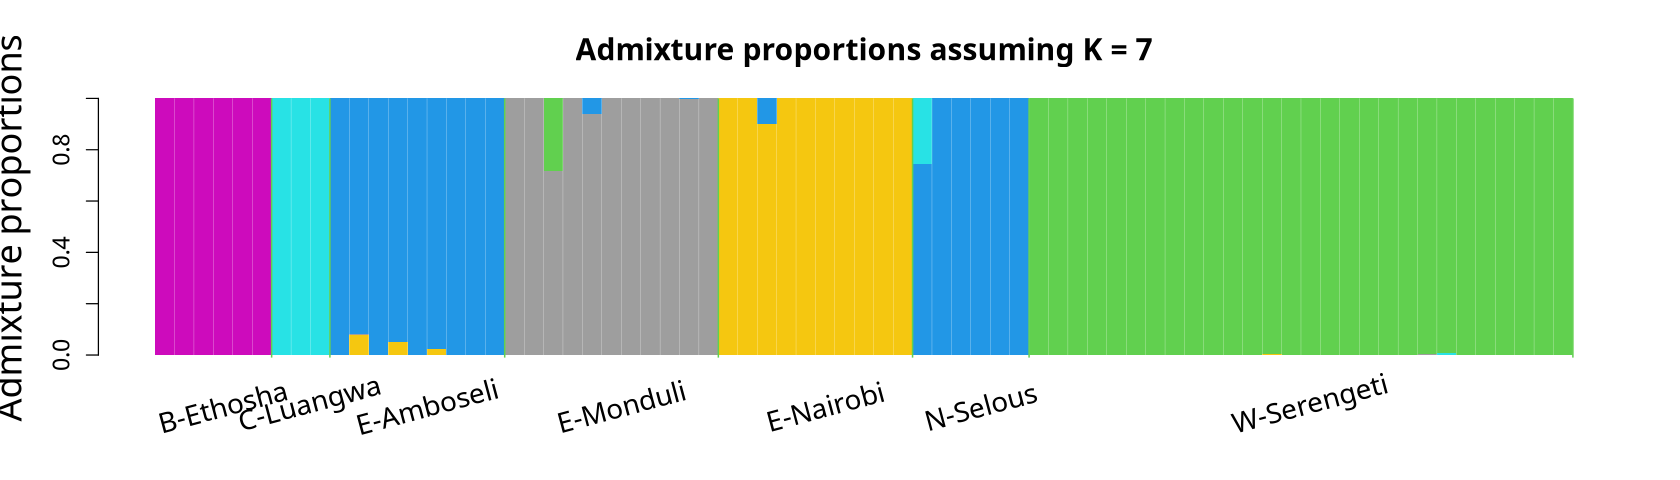

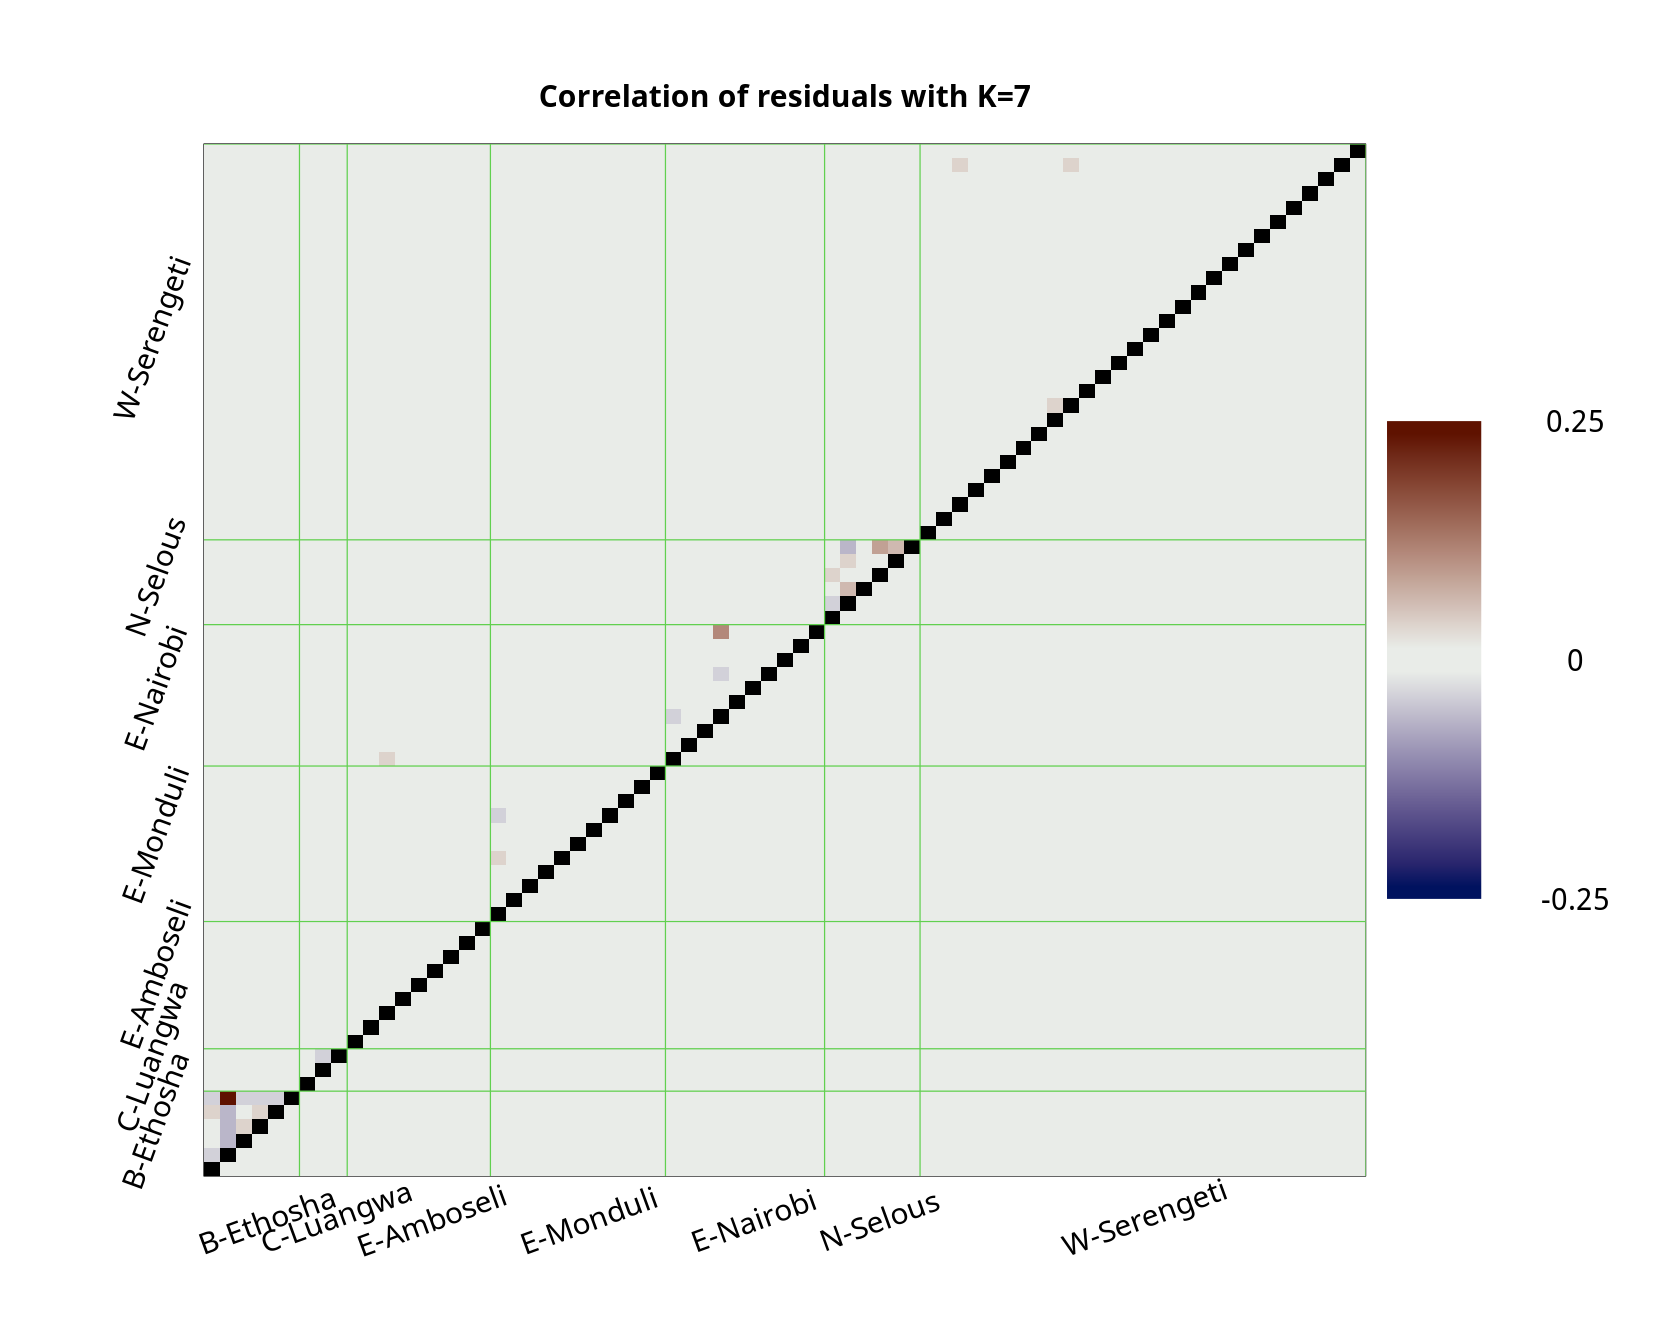

In [50]:
#make plot wide
library("repr")

#read in code to plot admixture proportions ( plotAdmix function)
source("./visFuns.R")

#read in the population labels (first column of fam file)
pop <- read.table("./blue_wildebeest_noLD.fam")[,1]
    options(repr.plot.width=14, repr.plot.height=4)

# Read in inferred admixture proportions
K=2
for(K in 2:7){
   
    q <- read.table(paste0("./allK/blue_wildebeest_noLD.",K,".Q_1"))

    #read in the population labels (first column of fam file)
    pop <- read.table("./blue_wildebeest_noLD.fam")[,1]

    #make the plot. 
 
    plotAdmix(q,pop=pop,rotatelab=15,padj=0.15,cex.lab=1.4,col=2:8)
    
    options(repr.plot.width=14, repr.plot.height=4)

    r <- as.matrix(read.table(paste0("./blue_wildebeest_noLD.",K,".eval_1")))

    plotCorRes(r, pop=pop, max_z = 0.25,rotatelabpop =20,adjlab = .05,title=paste0("Correlation of residuals with K=",K))
   options(repr.plot.width=14, repr.plot.height=11)

}
#for(K in 2:7){
#    r <- as.matrix(read.table(paste0("~/kenya2024/admixture/blue_wildebeest_noLD.",K,".eval_1")))
#    plotCorRes(r, pop=pop, max_z = 0.25,rotatelabpop =20,adjlab = .05,title=paste0("Correlation of residuals with K=",K))
#}



 - How high a K is needed to have a good fit?
 - at K=4 selous and luangwa have the same component. Can you then conclude that they are the same population? and how can you use evalAdmix to help you interpretation
 